## **Machine Learning Workflow**
---

### 1. <font color='blue'> Importing Data to Python</font> 
    * Drop Duplicates 
### 2. <font color='blue'> Data Preprocessing:</font> 
    * Input-Output Split, Train-Test Split
    * Imputation, Processing Categorical, Normalization 
### 3. <font color='blue'> Training Machine Learning:</font> 
    * Choose Score to optimize and Hyperparameter Space

## **Stroke Prediction Analysis**
---

- Task : Classification
- Objective : Prediksi seseorang berpeluang menderita stroke"

<br>

<center>
<img src="https://res.cloudinary.com/dk0z4ums3/image/upload/v1663136389/attached_image/stroke-iskemik-0-alodokter.jpg">
</center>

### **Data description:**

Terdapat <font color='blue'>5.110</font> row dengan <font color='blue'>12</font> fitur. Fitur-fitur tersebut adalah 
- `ID`: unique identifier
- `GENDER`: **"Male"**, **"Female"** atau **"Other"**
- `AGE`: Umur dari pasien
- `HYPERTENSION`: 
<br>**“No”** jika pasien tidak menderita hipertensi 
<br>Normal dengan tekanan darah sistolik < 120 mmHg dan diastolic < 80 mmHg
<br>Pre-hipertensi dengan tekanan darah sistolik 120-139 dan diastolic 80-89)
<br>**“Yes”** jika pasien menderita hipertensi
<br>Hipertensi derajat 1 dengan tekanan darah sistolik 140-159 mmHg dan diastolic 90-99 mmHg
<br>Hipertensi derajat 2 dengan tekanan darah sistolik >160 mmHg dan diastolic >100 mmHg
- `HEART_DISEASE`: **“No”** jika pasien tidak pernah menderita penyakit jantung, **“Yes”** jika pasien pernah menderita penyakit jantung
- `EVER_MARRIED`: "No" atau "Yes"
- `WORK_TYPE` : "children", "Govt_jov", "Never_worked", "Private" atau "Self-employed"
- `RESIDENCE_TYPE` : "Rural" atau "Urban"
- `AVG_GLUCOSE_LEVEL` : rata-rata glukosa dalam darah (mg/dL)
- `BMI` : body mass index
<br>Underweight
<br>Batas Normal
<br>Overweight
<br>Pre-obese
<br>Obese I
<br>Obese II
- `SMOKING_STATUS` : "formerly smoked", "never smoked", "smokes" or "Unknown"*

**Output variable (desired target)**
- `STROKE` - "Yes" jika pasien menderita stroke atau "No" jika pasien tidak menderita stroke
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient



## <b><font color='blue'>1.  Importing Data to Python</font></b>
---

**Import library pengolahan data**

In [878]:
!pip install imblearn

In [879]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as scs
import warnings
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

from sklearn.metrics import classification_report, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import warnings
warnings.filterwarnings("ignore")

#### Load dataset

In [880]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [881]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,67,Female,17.0,No,No,No,Private,Urban,92.97,NaN,formerly smoked,No
1,77,Female,13.0,No,No,No,children,Rural,85.81,18.6,Unknown,No
2,84,Male,55.0,No,No,Yes,Private,Urban,89.17,31.5,never smoked,No
3,91,Female,42.0,No,No,No,Private,Urban,98.53,18.5,never smoked,No
4,99,Female,31.0,No,No,No,NaN,Urban,108.89,52.3,Unknown,No
...,...,...,...,...,...,...,...,...,...,...,...,...
5251,72911,Female,57.0,Yes,No,Yes,NaN,Rural,129.54,60.9,smokes,No
5252,72914,Female,19.0,No,No,No,Private,Urban,90.57,24.2,Unknown,No
5253,72915,Female,45.0,No,No,Yes,Private,NaN,172.33,45.3,formerly smoked,No
5254,72918,Female,53.0,Yes,No,Yes,Private,Urban,62.55,30.3,Unknown,Yes


**Cek banyak observasi**

In [882]:
df.shape

(5256, 12)

**Cek dan Drop Data Duplikat**

In [883]:
sum(df.duplicated())

146

**Drop data duplikat dengan `.drop_duplicates()`**

In [884]:
df = df.drop_duplicates()

**Sanity Check Jumlah Observasi**

In [885]:
df.shape

(5110, 12)

**Membuat dalam fungsi**

1. Import data
2. Cek **Jumlah observasi** dan **Jumlah kolom**
3. Drop duplicate
4. Cek **Jumlah observasi** dan **Jumlah kolom** setelah di-drop
5. Return data setelah di-drop

In [886]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
print("Data asli            : ", data.shape, "- (#observasi, #kolom)")

data = data.drop_duplicates()
print("Data setelah di-drop : ", data.shape, "- (#observasi, #kolom)")

Data asli            :  (5256, 12) - (#observasi, #kolom)
Data setelah di-drop :  (5110, 12) - (#observasi, #kolom)


In [887]:
def importData(filename):
    """
    Fungsi untuk import data & hapus duplikat
    :param filename: <string> nama file input (format .csv)
    :return df: <pandas dataframe> sampel data
    """

    # read data
    df = pd.read_csv(filename)
    print("Data asli            : ", df.shape, "- (#observasi, #kolom)")

    # drop duplicates
    df = df.drop_duplicates()
    print("Data setelah di-drop : ", df.shape, "- (#observasi, #kolom)")

    return df

# (filename) adalah argumen
# Argumen adalah sebuah variable. 
# Jika fungsi tsb. diberi argumen filename = "healthcare-dataset-stroke-data.csv", 
# maka semua variabel 'filename' di dalam fungsi 
# akan berubah menjadi "healthcare-dataset-stroke-data.csv"

In [888]:
# input
file_credit = "healthcare-dataset-stroke-data.csv"

# panggil fungsi
data = importData(filename = file_credit)

Data asli            :  (5256, 12) - (#observasi, #kolom)
Data setelah di-drop :  (5110, 12) - (#observasi, #kolom)


In [889]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,67,Female,17.0,No,No,No,Private,Urban,92.97,NaN,formerly smoked,No
1,77,Female,13.0,No,No,No,children,Rural,85.81,18.6,Unknown,No
2,84,Male,55.0,No,No,Yes,Private,Urban,89.17,31.5,never smoked,No
3,91,Female,42.0,No,No,No,Private,Urban,98.53,18.5,never smoked,No
4,99,Female,31.0,No,No,No,NaN,Urban,108.89,52.3,Unknown,No


## <b><font color='blue'>2.  Data Preprocessing</font></b>
---

### **Input-Output Split**

- Fitur `y` adalah output variabel dari data stroke
- Fitur `x` adalah fitur selain data stroke

In [890]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,67,Female,17.0,No,No,No,Private,Urban,92.97,NaN,formerly smoked,No
1,77,Female,13.0,No,No,No,children,Rural,85.81,18.6,Unknown,No
2,84,Male,55.0,No,No,Yes,Private,Urban,89.17,31.5,never smoked,No
3,91,Female,42.0,No,No,No,Private,Urban,98.53,18.5,never smoked,No
4,99,Female,31.0,No,No,No,NaN,Urban,108.89,52.3,Unknown,No


#### Mengelompokan data target

In [891]:
y = df["stroke"]
y.head()

0    No
1    No
2    No
3    No
4    No
Name: stroke, dtype: object

**Buat data input**

- DATA = INPUT + OUTPUT
- DATA - OUTPUT = INPUT
- Jadi kalau dari data, kita drop VARIABLE OUTPUT, maka tersisa hanya variabel INPUT.

#### Membuat data input

In [892]:
X = df.drop(["stroke"], axis=1)
X.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,67,Female,17.0,No,No,No,Private,Urban,92.97,NaN,formerly smoked
1,77,Female,13.0,No,No,No,children,Rural,85.81,18.6,Unknown
2,84,Male,55.0,No,No,Yes,Private,Urban,89.17,31.5,never smoked
3,91,Female,42.0,No,No,No,Private,Urban,98.53,18.5,never smoked
4,99,Female,31.0,No,No,No,NaN,Urban,108.89,52.3,Unknown


**Buat semuanya jadi fungsi**
1. buat output_data
2. buat input_data
3. return input_data dan output_data

In [893]:
# isi perintah yang akan dimasukkan ke dalam fungsi
output_data = data["stroke"]
input_data = data.drop("stroke",
                       axis = 1)

In [894]:
def extractInputOutput(data,
                       output_column_name,
                       column_to_drop):
    """
    Fungsi untuk memisahkan data input dan output
    :param data: <pandas dataframe> data seluruh sample
    :param output_column_name: <string> nama kolom output
    :return input_data: <pandas dataframe> data input
    :return output_data: <pandas series> data output
    """
    # drop data
    data = data.drop(columns = column_to_drop)
    output_data = data[output_column_name]
    input_data = data.drop(output_column_name,
                           axis = 1)
    
    return input_data, output_data

# (data, output_column_name) adalah argumen
# Argumen adalah sebuah variable. 
# Jika fungsi tsb. diberi argumen data = healthcare-dataset-stroke-data.csv, 
# maka semua variabel 'data' di dalam fungsi akan berubah menjadi healthcare-dataset-stroke-data.csv

In [895]:
# Jangan sampai salah urutan dalam penempatan return
column_to_drop = ["id"]
output_column_name = ["stroke"]

X, y = extractInputOutput(data = data,
                          output_column_name = output_column_name,
                          column_to_drop = column_to_drop)

**Selalu sanity check!**

In [896]:
X.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Female,17.0,No,No,No,Private,Urban,92.97,NaN,formerly smoked
1,Female,13.0,No,No,No,children,Rural,85.81,18.6,Unknown


In [897]:
y.head(2)

,stroke
0,No
1,No


**Check count value data**

In [898]:
for i in X.columns:
    print(i, ":", len(X[i].value_counts()))

gender : 3
age : 104
hypertension : 2
heart_disease : 2
ever_married : 2
work_type : 5
Residence_type : 2
avg_glucose_level : 3979
bmi : 418
smoking_status : 4


#### Check gender status

In [899]:
gender_columns = ["gender"]

for i in gender_columns:
    print(X[i].value_counts(normalize=True))

Female    0.585910
Male      0.413894
Other     0.000196
Name: gender, dtype: float64


In [900]:
# Terdapat kelas bernilai "Others" yang tidak terdapat di Deskripsi Variabel
# kelas "Others" dijadikan satu kelas dengan modus data yaitu "Female"
gender_list = ["Other"]

for i in gender_list:
    data.loc[data['gender']== i, 'gender'] = "Female"

In [901]:
# redefine the input and output after change some values of class in repayment and education
X, y = extractInputOutput(data = data,
                          output_column_name = output_column_name,
                          column_to_drop = column_to_drop)

<AxesSubplot:xlabel='gender', ylabel='count'>

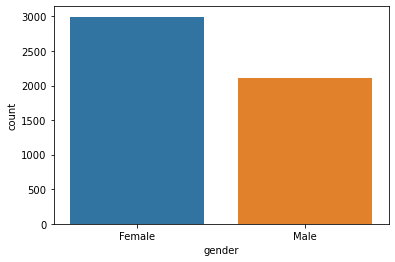

In [902]:
sns.countplot(data["gender"])

### **Train-Test Split**

- **Kenapa?**
  - Karena tidak mau overfit data training
  - Test data akan menjadi future data
  - Kita akan latih model ML di data training, dengan CV (Cross-validation)
  - Selanjutnya melakukan evaluasi di data testing

In [903]:
# Import train-test splitting library dari sklearn (scikit learn)
from sklearn.model_selection import train_test_split

**Train Test Split Function**
1. `X` adalah input
2. `y` adalah output (target)
3. `test_size` adalah seberapa besar proporsi data test dari keseluruhan data. Contoh `test_size = 0.2` artinya data test akan berisi 20% data.
4. `random_state` adalah kunci untuk random. Harus di-setting sama. Misal `random_state = 123`.
5. Output:
   - `X_train` = input dari data training
   - `X_test` = input dari data testing
   - `y_train` = output dari data training
   - `y_test` = output dari data testing
6. Urutan outputnya: `X_train, X_test, y_train, y_test`. Tidak boleh terbalik

> Readmore: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [904]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.25,
                                                    stratify = y,
                                                    random_state = 123)

In [905]:
# Sanity check hasil splitting
print(X_train.shape)
print(X_test.shape)

(3832, 10)
(1278, 10)


In [906]:
# Ratio
X_test.shape[0] / X.shape[0]

# Hasil 0.25 - sesuai dengan test_size kita

0.25009784735812135

## <b><font color='blue'>2.  Exploratory Data Analysis</font></b>
---

In [907]:
dataset = pd.concat([X_train, y_train], axis = 1)

In [908]:
dataset.describe()

,age,avg_glucose_level,bmi
count,3832.000000,3832.000000,3683.000000
mean,43.408299,105.785154,28.794135
std,22.706335,45.154458,7.815458
min,0.160000,55.120000,10.300000
25%,25.000000,77.067500,23.400000
50%,45.000000,91.565000,27.900000
75%,61.000000,113.425000,32.800000
max,82.000000,266.590000,97.600000


### 2.1. Cek Informasi Statistik

#### 2.1.1. Cek Skewness

In [909]:
# cek skewness
dataset.skew(numeric_only = True)

age                 -0.129150
avg_glucose_level    1.583383
bmi                  1.018919
dtype: float64

In [910]:
dataset["stroke"].value_counts()

No     3645
Yes     187
Name: stroke, dtype: int64

#### 2.1.2. Visualisasi untuk fitur Gender

#### Pemisahan Dataset berdasarkan Kelas

In [911]:
# pisahkan menjadi 2 kelas untuk melihat apakah kita perlu melakukan imputasi berdasarkan kelas
dataset_stroke = dataset[dataset.stroke == "Yes"].copy()
dataset_non_stroke = dataset[dataset.stroke != "Yes"].copy()

<AxesSubplot:xlabel='gender', ylabel='count'>

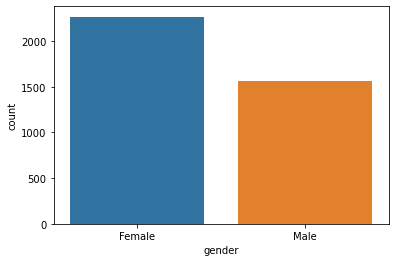

In [912]:
sns.countplot(dataset["gender"])

In [913]:
dataset["gender"].value_counts()

Female    2266
Male      1566
Name: gender, dtype: int64

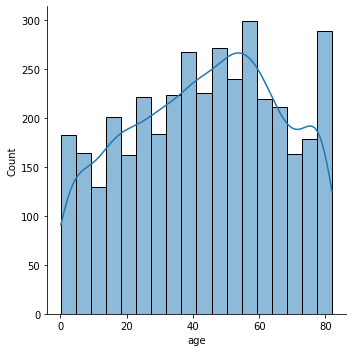

In [914]:
sns.displot(dataset["age"],kde=True)

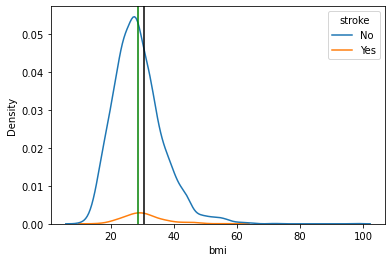

In [915]:
# plot untuk melihat distribusi bmi jika tidak dibedakan berdasarkan categori
sns.kdeplot(data = dataset, x = "bmi", hue = "stroke")
plt.axvline(dataset_non_stroke.bmi.mean(), 0, 1, color = "g")
plt.axvline(dataset_stroke.bmi.mean(), 0, 1, color = "k")

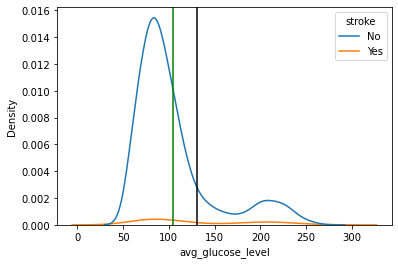

In [916]:
# plot untuk melihat distribusi avg_glucose_level jika tidak dibedakan berdasarkan categori
sns.kdeplot(data = dataset, x = "avg_glucose_level", hue = "stroke")
plt.axvline(dataset_non_stroke.avg_glucose_level.mean(), 0, 1, color = "g")
plt.axvline(dataset_stroke.avg_glucose_level.mean(), 0, 1, color = "k")

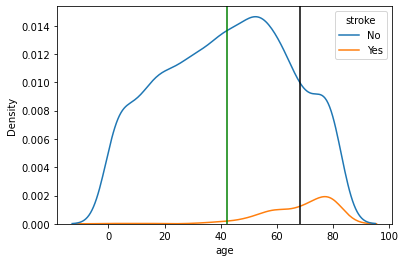

In [917]:
# plot untuk melihat distribusi age jika tidak dibedakan berdasarkan categori
sns.kdeplot(data = dataset, x = "age", hue = "stroke")
plt.axvline(dataset_non_stroke.age.mean(), 0, 1, color = "g")
plt.axvline(dataset_stroke.age.mean(), 0, 1, color = "k")

<AxesSubplot:xlabel='hypertension', ylabel='count'>

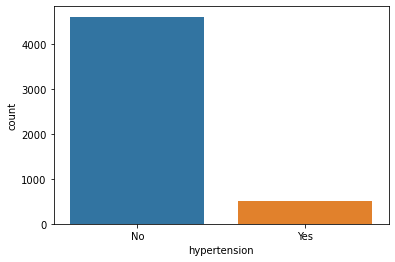

In [918]:
sns.countplot(df["hypertension"])

In [919]:
df["hypertension"].value_counts()

No     4612
Yes     498
Name: hypertension, dtype: int64

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

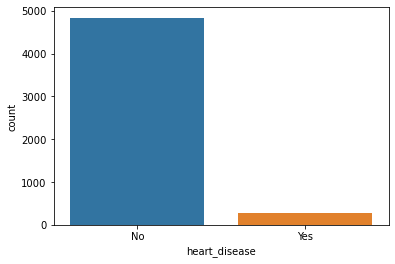

In [920]:
sns.countplot(df["heart_disease"])

In [921]:
df["heart_disease"].value_counts()

No     4834
Yes     276
Name: heart_disease, dtype: int64

<AxesSubplot:xlabel='ever_married', ylabel='count'>

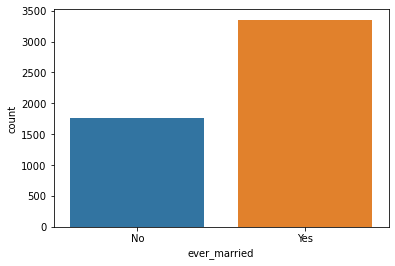

In [922]:
sns.countplot(df["ever_married"])

In [923]:
df["ever_married"].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

<AxesSubplot:xlabel='work_type', ylabel='count'>

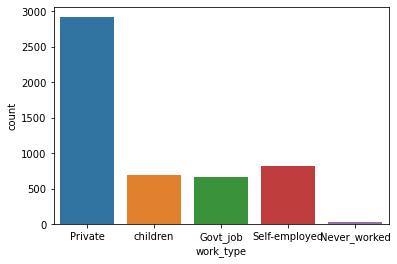

In [924]:
sns.countplot(df["work_type"])

In [925]:
df["work_type"].value_counts()

Private          2921
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

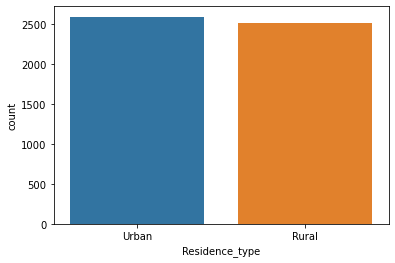

In [926]:
sns.countplot(df["Residence_type"])

In [927]:
df["bmi"].isnull().value_counts()

False    4909
True      201
Name: bmi, dtype: int64

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

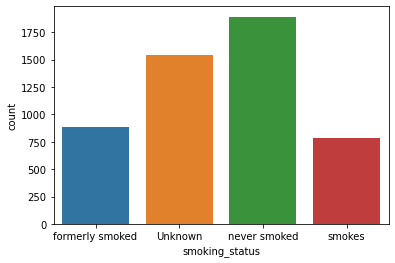

In [928]:
sns.countplot(df["smoking_status"])

In [929]:
df_class_0 = df[df["stroke"]=="No"]
df_class_1 = df[df["stroke"]=="Yes"]

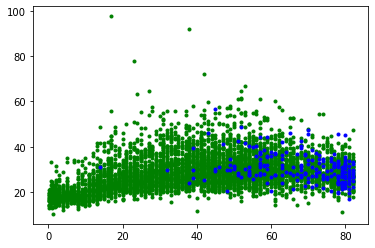

In [930]:
plt.scatter(df_class_0["age"] ,df_class_0["bmi"], c = 'g', marker='.')
plt.scatter(df_class_1["age"] ,df_class_1["bmi"], c = 'b', marker='.')

In [931]:
df.corr()

,id,age,avg_glucose_level,bmi
id,1.000000,0.003538,0.001092,0.003084
age,0.003538,1.000000,0.238171,0.333398
avg_glucose_level,0.001092,0.238171,1.000000,0.175502
bmi,0.003084,0.333398,0.175502,1.000000


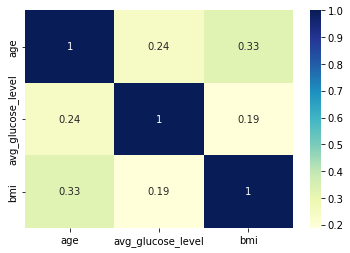

In [932]:
dataplot = sns.heatmap(dataset.corr(), cmap="YlGnBu", annot=True)

#### T Test untuk Age

In [933]:
# h0    = mean Age untuk kelas 0 = mean Age untuk kelas 1
# h1    = mean Age untuk kelas 0 != mean Age untuk kelas 1

In [934]:
# perform t-test untuk 2 variabel
scs.ttest_ind(
    dataset_stroke[dataset_stroke.age.isnull() != True].age,
    dataset_non_stroke[dataset_non_stroke.age.isnull() != True].age
)

Ttest_indResult(statistic=15.69226117442643, pvalue=7.848904746561998e-54)

In [935]:
# nilai t critical untuk alpha 0.05
scs.t.ppf(0.05, df = (len(dataset) - 2))

-1.6452515747386196

In [936]:
# dengan nilai t-value > t-critical dan nilai p-value < 0.05 maka h0 di reject
# mean antara kelas 0 dan kelas 1 untuk pm10 statistically significant

#### T Test untuk BMI

In [937]:
# h0    = mean BMI untuk kelas 0 = mean BMI untuk kelas 1
# h1    = mean BMI untuk kelas 0 != mean BMI untuk kelas 1

In [938]:
# perform t-test untuk 2 variabel
scs.ttest_ind(
    dataset_stroke[dataset_stroke.bmi.isnull() != True].bmi,
    dataset_non_stroke[dataset_non_stroke.bmi.isnull() != True].bmi
)

Ttest_indResult(statistic=2.900632085426955, pvalue=0.0037461789362605636)

In [939]:
# nilai t critical untuk alpha 0.05
scs.t.ppf(0.05, df = (len(dataset) - 2))

-1.6452515747386196

#### T Test untuk avg_glucose_level

In [940]:
# h0    = mean avg_glucose_level untuk kelas 0 = mean avg_glucose_level untuk kelas 1
# h1    = mean avg_glucose_level untuk kelas 0 != mean avg_glucose_level untuk kelas 1

In [941]:
# perform t-test untuk 2 variabel
scs.ttest_ind(
    dataset_stroke[dataset_stroke.avg_glucose_level.isnull() != True].avg_glucose_level,
    dataset_non_stroke[dataset_non_stroke.avg_glucose_level.isnull() != True].avg_glucose_level
)

Ttest_indResult(statistic=7.9111458021588295, pvalue=3.310799125467501e-15)

In [942]:
# nilai t critical untuk alpha 0.05
scs.t.ppf(0.05, df = (len(dataset) - 2))

-1.6452515747386196

In [943]:
# dengan nilai t-value < t-critical dan nilai p-value < 0.05 maka h0 di reject
# mean antara kelas 0 dan kelas 1 untuk Age statistically significant

### Cek Imbalance Label

In [944]:
dataset.stroke.value_counts()

No     3645
Yes     187
Name: stroke, dtype: int64

<AxesSubplot:xlabel='stroke', ylabel='Count'>

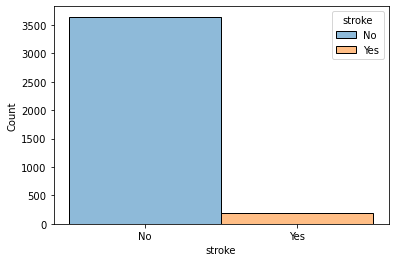

In [945]:
sns.histplot(data = dataset, x = "stroke", hue = "stroke")

### Cek Outliers

<AxesSubplot:xlabel='age', ylabel='stroke'>

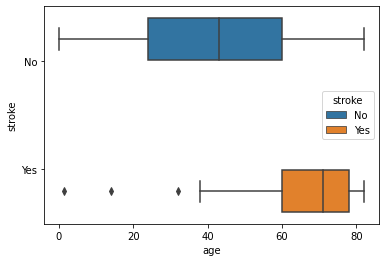

In [946]:
sns.boxplot(data = dataset, x ="age", y = "stroke", hue = "stroke")

<AxesSubplot:xlabel='bmi', ylabel='stroke'>

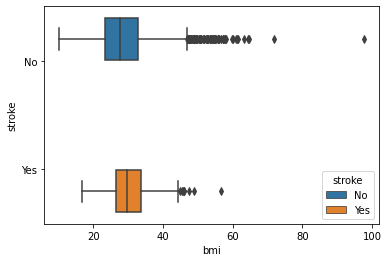

In [947]:
sns.boxplot(data = dataset, x ="bmi", y = "stroke", hue = "stroke")

<AxesSubplot:xlabel='avg_glucose_level', ylabel='stroke'>

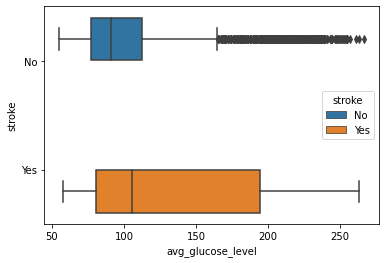

In [948]:
sns.boxplot(data = dataset, x ="avg_glucose_level", y = "stroke", hue = "stroke")

### **Data Imputation**

- Proses pengisian data yang kosong (NaN)
- Ada 2 hal yang diperhatikan:
  - Numerical Imputation
  - Categorical Imputation

**Cek data yang kosong dari variabel input**

In [949]:
X_train.isnull().sum()

# Output: nama variabel, True/False.
# Jika True, maka ada data yang kosong

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              1
Residence_type         8
avg_glucose_level      0
bmi                  149
smoking_status         0
dtype: int64

**Bedakan antara data categorical & numerical**

In [950]:
X_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
5050,Female,38.0,Yes,No,Yes,Private,Rural,109.46,41.5,never smoked
1530,Female,26.0,No,No,No,Private,Urban,116.68,18.7,formerly smoked
623,Female,37.0,No,No,Yes,Private,Urban,74.51,29.5,Unknown
4370,Female,28.0,No,No,No,Private,Rural,96.86,29.0,Unknown
5069,Female,25.0,No,No,Yes,Private,Urban,60.84,24.5,never smoked


**Numerical Imputation**

In [951]:
X_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

#### Pisahkan kolom numerik dan kategori

In [952]:
categorical_column = ['gender', 'hypertension', 'heart_disease', 'ever_married', 
                      'work_type', 'Residence_type', 'smoking_status']

numerical_column = ['age', 'avg_glucose_level', 'bmi']

In [953]:
# Seleksi dataframe numerik
X_train_numerical = X_train[numerical_column]

In [954]:
X_train_numerical.head()

,age,avg_glucose_level,bmi
5050,38.0,109.46,41.5
1530,26.0,116.68,18.7
623,37.0,74.51,29.5
4370,28.0,96.86,29.0
5069,25.0,60.84,24.5


**Cek apakah ada data numerik yang kosong**

In [955]:
X_train_numerical.isnull().any()

# Semua variabel numerical memiliki missing values

age                  False
avg_glucose_level    False
bmi                   True
dtype: bool

**Gunakan imputer dari sklearn untuk data imputation numerik saja**

In [956]:
from sklearn.impute import SimpleImputer

In [957]:
imputer = SimpleImputer(missing_values = np.nan,
                        strategy = "median")

# namakan function SimpleImputer menjadi imputer, jangan lupa tanda kurung ()
# missing_values adalah tanda missing values dalam data.
#   - bisa NaN, bisa 999, bisa "KOSONG"
# Strategy median adalah strategy imputasi, 
# jika data kosong, diganti dengan median target
# Strategi lainnya adalah: mean

- `fit` : imputer agar mengetahui mean atau median dari tiap kolom
- `transform` : isi data dengan median atau mean
- output dari transform adalah pandas dataframe
- namakan kolom `X_train_numerical_imputed` sesuai dengan `X_train_numerical`.
   - MENGAPA? karena kita kehilangan nama kolom setelah data imputation
- beri index dari `X_train_numerical_imputed` sesuai dengan `X_train_numerical`.
   - MENGAPA? karena kita kehilangan index setelah data imputation

In [958]:
# Isi perintah yang akan dibuat dalam fungsi

# Fit imputer
imputer.fit(X_train_numerical)

# Transform
imputed_data = imputer.transform(X_train_numerical)
X_train_numerical_imputed = pd.DataFrame(imputed_data)

X_train_numerical_imputed.columns = X_train_numerical.columns
X_train_numerical_imputed.index = X_train_numerical.index

In [959]:
X_train_numerical_imputed.isnull().any()

age                  False
avg_glucose_level    False
bmi                  False
dtype: bool

**Membuat dalam fungsi**

In [960]:
from sklearn.impute import SimpleImputer

def numericalImputation(data, numerical_column):
    """
    Fungsi untuk melakukan imputasi data numerik
    :param data: <pandas dataframe> sample data input
    :param numerical_column: <list> list kolom numerik data
    :return X_train_numerical: <pandas dataframe> data numerik
    :return imputer_numerical: numerical imputer method
    """
    # Filter data numerik
    numerical_data = data[numerical_column]

    # Buat imputer
    imputer_numerical = SimpleImputer(missing_values = np.nan,
                                      strategy = "median")
    imputer_numerical.fit(numerical_data)

    # Transform
    imputed_data = imputer_numerical.transform(numerical_data)
    numerical_data_imputed = pd.DataFrame(imputed_data)

    numerical_data_imputed.columns = numerical_column
    numerical_data_imputed.index = numerical_data.index

    return numerical_data_imputed, imputer_numerical

In [961]:
# Imputation Numeric
X_train_numerical, imputer_numerical = numericalImputation(data = X_train,
                                                           numerical_column = numerical_column)

In [962]:
X_train_numerical.isnull().any()

age                  False
avg_glucose_level    False
bmi                  False
dtype: bool

**Categorical Imputation**

In [963]:
categorical_column

['gender',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status']

In [964]:
# Periksa lagi missing value
categorical_data = X_train[categorical_column]
categorical_data.isnull().sum()

gender            0
hypertension      0
heart_disease     0
ever_married      0
work_type         1
Residence_type    8
smoking_status    0
dtype: int64

In [965]:
# Kita isi kolom kategorik dengan "KOSONG"
categorical_data = X_train[categorical_column]
categorical_data = categorical_data.fillna(value="Kosong")

**Mari buat dalam bentuk function**

In [966]:
def categoricalImputation(data, categorical_column):
    """
    Fungsi untuk melakukan imputasi data kategorik
    :param data: <pandas dataframe> sample data input
    :param categorical_column: <list> list kolom kategorikal data
    :return categorical_data: <pandas dataframe> data kategorikal
    """
    # seleksi data
    categorical_data = data[categorical_column]

    # lakukan imputasi
    categorical_data = categorical_data.fillna(value="KOSONG")

    return categorical_data

In [967]:
X_train_categorical = categoricalImputation(data = X_train,
                                            categorical_column = categorical_column)

In [968]:
X_train_categorical.isnull().sum()

gender            0
hypertension      0
heart_disease     0
ever_married      0
work_type         0
Residence_type    0
smoking_status    0
dtype: int64

### **Preprocessing Categorical Variables**

- Kita tidak bisa memasukkan data categorical, jika tidak diubah menjadi numerical
- Solusi: One Hot Encoding (OHE) / Label Encoder

In [969]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
le = preprocessing.LabelEncoder()

# Memisahkan kolom yang menggunakan LE & OHE
categorical_le_columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type']
categorical_ohe_columns = ['work_type', 'smoking_status']

# Encode labels in column.
categorical_le = X_train_categorical[categorical_le_columns].apply(le.fit_transform)
categorical_ohe = pd.get_dummies(X_train_categorical[categorical_ohe_columns])

In [970]:
def extractCategoricalOHE(data, categorical_column):
    """
    Fungsi untuk ekstrak data kategorikal dengan One Hot Encoding
    :param data: <pandas dataframe> data sample
    :param categorical_column: <list> list kolom kategorik
    :return categorical_ohe: <pandas dataframe> data sample dengan ohe
    """
    data_categorical = data[categorical_column]
    categorical_ohe = pd.get_dummies(data_categorical)

    return categorical_ohe

In [971]:
def extractCategoricalLE(data, categorical_column):
    """
    Fungsi untuk ekstrak data kategorikal dengan One Hot Encoding
    :param data: <pandas dataframe> data sample
    :param categorical_column: <list> list kolom kategorik
    :return categorical_ohe: <pandas dataframe> data sample dengan ohe
    """
    data_categorical = data[categorical_column]
    categorical_le = data.apply(preprocessing.LabelEncoder().fit_transform)

    return categorical_le

In [972]:
# extractCategoricalOHE
X_train_categorical_ohe = extractCategoricalOHE(data = X_train_categorical[categorical_ohe_columns],
                                                categorical_column = categorical_ohe_columns)

In [973]:
X_train_categorical_ohe.head()

,work_type_Govt_job,work_type_KOSONG,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
5050,0,0,0,1,0,0,0,0,1,0
1530,0,0,0,1,0,0,0,1,0,0
623,0,0,0,1,0,0,1,0,0,0
4370,0,0,0,1,0,0,1,0,0,0
5069,0,0,0,1,0,0,0,0,1,0


In [974]:
# extractCategoricalLE
X_train_categorical_le = extractCategoricalLE(data = X_train_categorical[categorical_le_columns],
                                              categorical_column = categorical_le_columns)

In [975]:
X_train_categorical_le

,gender,hypertension,heart_disease,ever_married,Residence_type
5050,0,1,0,1,1
1530,0,0,0,0,2
623,0,0,0,1,2
4370,0,0,0,0,1
5069,0,0,0,1,2
...,...,...,...,...,...
4861,0,0,0,1,1
3872,0,0,0,1,2
4885,0,0,0,1,1
944,0,0,0,1,1


In [976]:
# Simpan kolom OHE untuk diimplementasikan dalam testing data
# Agar shape-nya konsisten
ohe_columns = X_train_categorical_ohe.columns

In [977]:
ohe_columns

Index(['work_type_Govt_job', 'work_type_KOSONG', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

#### Label Encoding y_train

In [978]:
y_train = y_train.apply(le.fit_transform)

In [979]:
y_train

,stroke
5050,0
1530,0
623,0
4370,0
5069,0
...,...
4861,0
3872,0
4885,0
944,0


### **Join data Numerical dan Categorical**

- Data numerik & kategorik harus disatukan kembali
- Penyatuan dengan `pd.concat`

In [980]:
X_train_concat = pd.concat([X_train_numerical,
                            X_train_categorical_le,
                            X_train_categorical_ohe],
                           axis = 1)

In [981]:
X_train_concat.head()

,age,avg_glucose_level,bmi,gender,hypertension,heart_disease,ever_married,Residence_type,work_type_Govt_job,work_type_KOSONG,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
5050,38.0,109.46,41.5,0,1,0,1,1,0,0,0,1,0,0,0,0,1,0
1530,26.0,116.68,18.7,0,0,0,0,2,0,0,0,1,0,0,0,1,0,0
623,37.0,74.51,29.5,0,0,0,1,2,0,0,0,1,0,0,1,0,0,0
4370,28.0,96.86,29.0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
5069,25.0,60.84,24.5,0,0,0,1,2,0,0,0,1,0,0,0,0,1,0


In [982]:
X_train_concat.shape

(3832, 18)

In [983]:
X_train_concat.isnull().any()

age                               False
avg_glucose_level                 False
bmi                               False
gender                            False
hypertension                      False
heart_disease                     False
ever_married                      False
Residence_type                    False
work_type_Govt_job                False
work_type_KOSONG                  False
work_type_Never_worked            False
work_type_Private                 False
work_type_Self-employed           False
work_type_children                False
smoking_status_Unknown            False
smoking_status_formerly smoked    False
smoking_status_never smoked       False
smoking_status_smokes             False
dtype: bool

### **Standardizing Variables**

- Menyamakan skala dari variabel input
- `fit`: imputer agar mengetahui mean dan standar deviasi dari setiap kolom
- `transform`: isi data dengan value yang sudah dinormalisasi
- output dari transform berupa pandas dataframe
- normalize dikeluarkan karena akan digunakan pada data test

In [984]:
from sklearn.preprocessing import StandardScaler

# Buat fungsi
def standardizerData(data):
    """
    Fungsi untuk melakukan standarisasi data
    :param data: <pandas dataframe> sampel data
    :return standardized_data: <pandas dataframe> sampel data standard
    :return standardizer: method untuk standardisasi data
    """
    data_columns = data.columns  # agar nama kolom tidak hilang
    data_index = data.index  # agar index tidak hilang

    # buat (fit) standardizer
    standardizer = StandardScaler()
    standardizer.fit(data)

    # transform data
    standardized_data_raw = standardizer.transform(data)
    standardized_data = pd.DataFrame(standardized_data_raw)
    standardized_data.columns = data_columns
    standardized_data.index = data_index

    return standardized_data, standardizer

In [985]:
X_train_clean, standardizer = standardizerData(data = X_train_concat)

In [986]:
X_train_clean.head()

,age,avg_glucose_level,bmi,gender,hypertension,heart_disease,ever_married,Residence_type,work_type_Govt_job,work_type_KOSONG,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
5050,-0.238216,0.081395,1.662635,-0.831316,3.063466,-0.237127,0.722387,-1.005826,-0.391819,-0.016156,-0.068698,0.867278,-0.435537,-0.3896,-0.650751,-0.460733,1.288124,-0.422317
1530,-0.766771,0.241311,-1.312734,-0.831316,-0.326428,-0.237127,-1.384300,0.977872,-0.391819,-0.016156,-0.068698,0.867278,-0.435537,-0.3896,-0.650751,2.170456,-0.776323,-0.422317
623,-0.282262,-0.692716,0.096651,-0.831316,-0.326428,-0.237127,0.722387,0.977872,-0.391819,-0.016156,-0.068698,0.867278,-0.435537,-0.3896,1.536686,-0.460733,-0.776323,-0.422317
4370,-0.678679,-0.197684,0.031402,-0.831316,-0.326428,-0.237127,-1.384300,-1.005826,-0.391819,-0.016156,-0.068698,0.867278,-0.435537,-0.3896,1.536686,-0.460733,-0.776323,-0.422317
5069,-0.810818,-0.995495,-0.555842,-0.831316,-0.326428,-0.237127,0.722387,0.977872,-0.391819,-0.016156,-0.068698,0.867278,-0.435537,-0.3896,-0.650751,-0.460733,1.288124,-0.422317


In [987]:
data_concat = pd.concat([X_train_clean,y_train], axis=1)

In [988]:
data_concat.head()

,age,avg_glucose_level,bmi,gender,hypertension,heart_disease,ever_married,Residence_type,work_type_Govt_job,work_type_KOSONG,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
5050,-0.238216,0.081395,1.662635,-0.831316,3.063466,-0.237127,0.722387,-1.005826,-0.391819,-0.016156,-0.068698,0.867278,-0.435537,-0.3896,-0.650751,-0.460733,1.288124,-0.422317,0
1530,-0.766771,0.241311,-1.312734,-0.831316,-0.326428,-0.237127,-1.384300,0.977872,-0.391819,-0.016156,-0.068698,0.867278,-0.435537,-0.3896,-0.650751,2.170456,-0.776323,-0.422317,0
623,-0.282262,-0.692716,0.096651,-0.831316,-0.326428,-0.237127,0.722387,0.977872,-0.391819,-0.016156,-0.068698,0.867278,-0.435537,-0.3896,1.536686,-0.460733,-0.776323,-0.422317,0
4370,-0.678679,-0.197684,0.031402,-0.831316,-0.326428,-0.237127,-1.384300,-1.005826,-0.391819,-0.016156,-0.068698,0.867278,-0.435537,-0.3896,1.536686,-0.460733,-0.776323,-0.422317,0
5069,-0.810818,-0.995495,-0.555842,-0.831316,-0.326428,-0.237127,0.722387,0.977872,-0.391819,-0.016156,-0.068698,0.867278,-0.435537,-0.3896,-0.650751,-0.460733,1.288124,-0.422317,0


## <b><font color='blue'> 2. Sampling</font></b>
---
    * Undersampling
    * Oversampling
    * Oversampling - SMOTHE

### 1. Undersampling

In [989]:
rus = RandomUnderSampler(random_state = 26)

In [990]:
x_rus, y_rus = rus.fit_resample(data_concat.drop("stroke", axis = 1), data_concat.stroke)

In [991]:
dataset_rus = pd.concat([x_rus, y_rus], axis = 1)

<AxesSubplot:xlabel='stroke', ylabel='Count'>

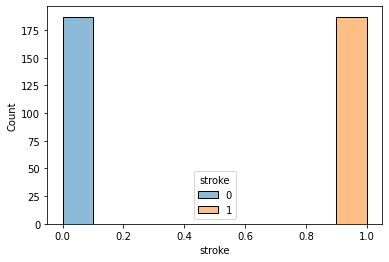

In [992]:
sns.histplot(dataset_rus, x = "stroke", hue = "stroke")

In [993]:
dataset_rus.shape

(374, 19)

### 2. Ovesampling

In [994]:
ros = RandomOverSampler(random_state = 11)

In [995]:
x_ros, y_ros = ros.fit_resample(data_concat.drop("stroke", axis = 1), data_concat.stroke)

In [996]:
dataset_ros = pd.concat([x_ros, y_ros], axis = 1)

<AxesSubplot:xlabel='stroke', ylabel='Count'>

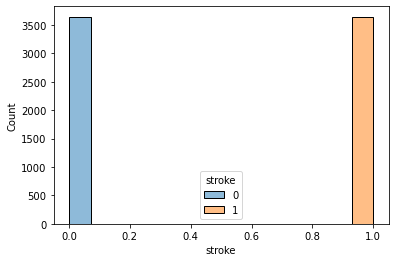

In [997]:
sns.histplot(dataset_ros, x = "stroke", hue = "stroke")

In [998]:
dataset_ros.shape

(7290, 19)

### 3. SMOTE

In [999]:
sm = SMOTE(random_state = 112)

In [1000]:
x_sm, y_sm = sm.fit_resample(data_concat.drop("stroke", axis = 1), data_concat.stroke)

In [1001]:
dataset_ros = pd.concat([x_ros, y_ros], axis = 1)

<AxesSubplot:xlabel='stroke', ylabel='Count'>

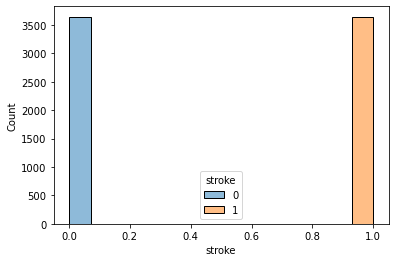

In [1002]:
sns.histplot(dataset_ros, x = "stroke", hue = "stroke")

In [1003]:
dataset_ros.shape

(7290, 19)

## <b><font color='blue'> 3. Training Machine Learning:</font></b>
---
    * Choose Score to optimize and Hyperparameter Space
    * Cross-Validation: Random vs Grid Search CV
    * Kita harus mengalahkan benchmark

### **Benchmark / Baseline**

- Baseline untuk evaluasi nanti
- Karena ini klasifikasi, bisa kita ambil dari proporsi kelas target yang terbesar
- Dengan kata lain, menebak hasil output marketing response dengan nilai "no" semua tanpa modeling

In [1004]:
y_train.value_counts(normalize = True)

# baseline akurasi = 95%

stroke
0         0.9512
1         0.0488
dtype: float64

### **1. Import Model**

- Misal kita gunakan 5 model ML untuk klasifikasi:
    - K-nearest neighbor (K-NN)
    - Logistic Regression
    - Support Vector Maching
    - Decision Tree
    - Random Forest

In [1005]:
# Import dari sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

### **2.1. Fitting Model - Normal Sampling**

- Cara fitting/training model mengikuti yang dokumentasi model

In [1006]:
# Model K nearest neighbor
knn = KNeighborsClassifier()
knn.fit(X_train_clean, y_train)

KNeighborsClassifier()

In [1007]:
# Model Logistic Regression
logreg = LogisticRegression(random_state = 123)
logreg.fit(X_train_clean, y_train)

LogisticRegression(random_state=123)

In [1008]:
# Model Random Forest Classifier
random_forest = RandomForestClassifier(random_state = 123)
random_forest.fit(X_train_clean, y_train)

RandomForestClassifier(random_state=123)

In [1009]:
# Model Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state = 123)
decision_tree.fit(X_train_clean, y_train)

DecisionTreeClassifier(random_state=123)

In [1010]:
# Model Support Vector Machine
svc = SVC(random_state = 123)
svc.fit(X_train_clean, y_train)

SVC(random_state=123)

### **2.2. Fitting Model - Under Sampling**

- Cara fitting/training model mengikuti yang dokumentasi model

In [1011]:
# Model K nearest neighbor
knn = KNeighborsClassifier()
knn.fit(x_rus, y_rus)

KNeighborsClassifier()

In [1012]:
# Model Logistic Regression
logreg = LogisticRegression(random_state = 123)
logreg.fit(x_rus, y_rus)

LogisticRegression(random_state=123)

In [1013]:
# Model Random Forest Classifier
random_forest = RandomForestClassifier(random_state = 123)
random_forest.fit(x_rus, y_rus)

RandomForestClassifier(random_state=123)

In [1014]:
# Model Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state = 123)
decision_tree.fit(x_rus, y_rus)

DecisionTreeClassifier(random_state=123)

In [1015]:
# Model Support Vector Machine
svc = SVC(random_state = 123)
svc.fit(x_rus, y_rus)

SVC(random_state=123)

### **2.3. Fitting Model - Over Sampling**

- Cara fitting/training model mengikuti yang dokumentasi model

In [1016]:
# Model K nearest neighbor
knn = KNeighborsClassifier()
knn.fit(x_ros, y_ros)

KNeighborsClassifier()

In [1017]:
# Model Logistic Regression
logreg = LogisticRegression(random_state = 123)
logreg.fit(x_ros, y_ros)

LogisticRegression(random_state=123)

In [1018]:
# Model Random Forest Classifier
random_forest = RandomForestClassifier(random_state = 123)
random_forest.fit(x_ros, y_ros)

RandomForestClassifier(random_state=123)

In [1019]:
# Model Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state = 123)
decision_tree.fit(x_ros, y_ros)

DecisionTreeClassifier(random_state=123)

In [1020]:
# Model Support Vector Machine
svc = SVC(random_state = 123)
svc.fit(x_ros, y_ros)

SVC(random_state=123)

### **2.4. Fitting Model - Over Sampling SMOTE**

- Cara fitting/training model mengikuti yang dokumentasi model

In [1021]:
# Model K nearest neighbor
knn = KNeighborsClassifier()
knn.fit(x_sm, y_sm)

KNeighborsClassifier()

In [1022]:
# Model Logistic Regression
logreg = LogisticRegression(random_state = 123)
logreg.fit(x_sm, y_sm)

LogisticRegression(random_state=123)

In [1023]:
# Model Random Forest Classifier
random_forest = RandomForestClassifier(random_state = 123)
random_forest.fit(x_sm, y_sm)

RandomForestClassifier(random_state=123)

In [1024]:
# Model Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state = 123)
decision_tree.fit(x_sm, y_sm)

DecisionTreeClassifier(random_state=123)

In [1025]:
# Model Support Vector Machine
svc = SVC(random_state = 123)
svc.fit(x_sm, y_sm)

SVC(random_state=123)

#### Lakukan Eksperimentasi

In [1026]:
# Import cross-validation
from sklearn.model_selection import GridSearchCV

#### Buat parameter untuk eksperimen

In [1074]:
# K-Nearest Neighbor
knn_params = {"n_neighbors": [3,5,7,9],
              "weights": ["uniform", "distance"]}


#Logistic Regression
logreg_params = {"penalty": ["l1", "l2"],
                 "C": np.logspace(-6, 6, 20)}

#Decision Tree
decTree_param = {"max_depth": [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                 "criterion": ["gini", "entropy", "log_loss"]}

#Support Vector Machine
svm_param = {"kernel": ["linear", "poly"],
             "C": np.logspace(-4, 4, 4)}

#Random Forest
B = [10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
rf_params = {"n_estimators": B,
             "max_features": ["sqrt", "log2"]}

#### Buat plan eksperimentasi

In [1075]:
#KNN
knn_cv = GridSearchCV(estimator = knn,
                         param_grid = knn_params,
                         cv = 5,
                         scoring = "f1")

#Logistic Regression
logreg_cv = GridSearchCV(estimator = logreg,
                         param_grid = logreg_params,
                         cv = 5,
                         scoring = "f1")

#Decision Tree
random_decTree = GridSearchCV(estimator = DecisionTreeClassifier(random_state=123),
                              param_grid = decTree_param,
                              cv = 5,
                              scoring = "f1") 
#Support Vector Machine
svc_cv = GridSearchCV(estimator = svc,
                      param_grid = svm_param,
                      cv = 5,
                      scoring = "f1")

#Random Forest
rf_tree_cv = GridSearchCV(estimator = random_forest,
                          param_grid = rf_params,
                          cv = 5,
                          scoring = "f1")

#### Lakukan fitting eksperimentasi

In [1029]:
knn_cv.fit(X_train_clean, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='f1')

In [1076]:
logreg_cv.fit(X_train_clean, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=123),
             param_grid={'C': array([1.00000000e-06, 4.28133240e-06, 1.83298071e-05, 7.84759970e-05,
       3.35981829e-04, 1.43844989e-03, 6.15848211e-03, 2.63665090e-02,
       1.12883789e-01, 4.83293024e-01, 2.06913808e+00, 8.85866790e+00,
       3.79269019e+01, 1.62377674e+02, 6.95192796e+02, 2.97635144e+03,
       1.27427499e+04, 5.45559478e+04, 2.33572147e+05, 1.00000000e+06]),
                         'penalty': ['l1', 'l2']},
             scoring='f1')

In [1031]:
random_decTree.fit(X_train_clean, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]},
             scoring='f1')

In [1032]:
#svc_cv.fit(X_train_clean, y_train)

In [1033]:
#rf_tree_cv.fit(X_train_clean, y_train)

In [1034]:
knn_cv.fit(X_train_clean, y_train)
logreg_cv.fit(X_train_clean, y_train)
random_decTree.fit(X_train_clean, y_train)
#svc_cv.fit(X_train_clean, y_train)
#rf_tree_cv.fit(X_train_clean, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]},
             scoring='f1')

#### Evaluasi model

In [1035]:
print(knn_cv.score(X_train_clean, y_train))
print(logreg_cv.score(X_train_clean, y_train))
print(random_decTree.score(X_train_clean, y_train))
#svc_cv.score(X_train_clean, y_train)
#rf_tree_cv.score(X_train_clean, y_train)

0.25316455696202533
0.0
0.7951070336391438


#### Best parameters

In [1036]:
print(knn_cv.best_params_)
print(logreg_cv.best_params_)
print(random_decTree.best_params_)
#svc_cv.best_params_
#rf_tree_cv.best_params_

{'n_neighbors': 3, 'weights': 'uniform'}
{'C': 1e-05, 'penalty': 'l2'}
{'criterion': 'gini', 'max_depth': 11}


- Buat model dengan **parameter terbaik** & pakai seluruh data training

In [1037]:
# Buat model
best_decTree = DecisionTreeClassifier(max_depth = random_decTree.best_params_["max_depth"],
                                      random_state = 123)

In [1038]:
best_knn = KNeighborsClassifier(n_neighbors = knn_cv.best_params_["n_neighbors"],
                                weights = knn_cv.best_params_["weights"])

In [1077]:
best_logreg = LogisticRegression(C = logreg_cv.best_params_["C"],
                                penalty = logreg_cv.best_params_["penalty"])

In [1040]:
# Fit model
best_decTree.fit(X_train_clean, y_train)

DecisionTreeClassifier(max_depth=11, random_state=123)

In [1041]:
best_knn.fit(X_train_clean, y_train)

KNeighborsClassifier(n_neighbors=3)

In [1079]:
best_logreg.fit(X_train_clean, y_train)

LogisticRegression(C=1e-06)

### **3. Prediction**

- Saatnya melakukan prediksi

In [1080]:
# Tanpa Sampling
predicted_logreg = pd.DataFrame(logreg.predict(X_train_clean))
predicted_knn = pd.DataFrame(knn.predict(X_train_clean))
predicted_svm = pd.DataFrame(svc.predict(X_train_clean))
predicted_dt = pd.DataFrame(decision_tree.predict(X_train_clean))
predicted_rf = pd.DataFrame(random_forest.predict(X_train_clean))
predicted_cvdt = pd.DataFrame(best_decTree.predict(X_train_clean))
predicted_cvlogreg = pd.DataFrame(best_logreg.predict(X_train_clean))
predicted_cvknn = pd.DataFrame(best_knn.predict(X_train_clean))

In [1043]:
# Undersampling
predicted_logreg_rus = pd.DataFrame(logreg.predict(x_rus))
predicted_knn_rus = pd.DataFrame(knn.predict(x_rus))
predicted_svm_rus = pd.DataFrame(svc.predict(x_rus))
predicted_dt_rus = pd.DataFrame(decision_tree.predict(x_rus))
predicted_rf_rus = pd.DataFrame(random_forest.predict(x_rus))
predicted_cvdt_rus = pd.DataFrame(best_decTree.predict(x_rus))
predicted_cvlogreg_rus = pd.DataFrame(best_logreg.predict(x_rus))
predicted_cvknn_rus = pd.DataFrame(best_knn.predict(x_rus))

In [1044]:
# Oversampling
predicted_logreg_ros = pd.DataFrame(logreg.predict(x_ros))
predicted_knn_ros = pd.DataFrame(knn.predict(x_ros))
predicted_svm_ros = pd.DataFrame(svc.predict(x_ros))
predicted_dt_ros = pd.DataFrame(decision_tree.predict(x_ros))
predicted_rf_ros = pd.DataFrame(random_forest.predict(x_ros))
predicted_cvdt_ros = pd.DataFrame(best_decTree.predict(x_ros))
predicted_cvlogreg_ros = pd.DataFrame(best_logreg.predict(x_ros))
predicted_cvknn_ros = pd.DataFrame(best_knn.predict(x_ros))

In [1047]:
# Oversampling - SMOTE
predicted_logreg_sm = pd.DataFrame(logreg.predict(x_sm))
predicted_knn_sm = pd.DataFrame(knn.predict(x_sm))
predicted_svm_sm = pd.DataFrame(svc.predict(x_sm))
predicted_dt_sm = pd.DataFrame(decision_tree.predict(x_sm))
predicted_rf_sm = pd.DataFrame(random_forest.predict(x_sm))
predicted_cvdt_sm = pd.DataFrame(best_decTree.predict(x_sm))
predicted_cvlogreg_sm = pd.DataFrame(best_logreg.predict(x_sm))
predicted_cvknn_sm = pd.DataFrame(best_knn.predict(x_sm))

### **4. Cek performa model di data training**

In [476]:
benchmark = y_train.value_counts(normalize=True)[0]
benchmark

0.9512004175365344

In [1081]:
# Tanpa Sampling
# akurasi knn
score_knn = knn.score(X_train_clean, y_train)

# akurasi logistic regression
score_logreg = logreg.score(X_train_clean, y_train)

# akurasi support vector machine
score_svc = svc.score(X_train_clean, y_train)

# akurasi decision tree
score_dt = decision_tree.score(X_train_clean, y_train)

# akurasi random forest
score_rf = random_forest.score(X_train_clean, y_train)

# akurasi decision tree cv
score_cvdt = best_decTree.score(X_train_clean, y_train)

# akurasi knn cv
score_cvknn = best_knn.score(X_train_clean, y_train)

# akurasi knn logreg
score_cvlogreg = best_logreg.score(X_train_clean, y_train)



print(f"Akurasi KNN : {score_knn}")
print(f"Akurasi Logistic Regression : {score_logreg}")
print(f"Akurasi Support Vector Machine : {score_svc}")
print(f"Akurasi Decision Tree : {score_dt}")
print(f"Akurasi Random Forest : {score_rf}")
print(f"Akurasi Cross Validation Decision Tree : {score_cvdt}")
print(f"Akurasi Cross Validation KNN : {score_cvknn}")
print(f"Akurasi Cross Validation Logistic Regression : {score_cvlogreg}")

Akurasi KNN : 0.8963987473903967
Akurasi Logistic Regression : 0.7463465553235908
Akurasi Support Vector Machine : 0.8449895615866388
Akurasi Decision Tree : 1.0
Akurasi Random Forest : 1.0
Akurasi Cross Validation Decision Tree : 0.9825156576200418
Akurasi Cross Validation KNN : 0.9538100208768268
Akurasi Cross Validation Logistic Regression : 0.9512004175365344


In [1048]:
# Undersampling
# akurasi knn
score_knn_rus = knn.score(x_rus, y_rus)

# akurasi logistic regression
score_logreg_rus = logreg.score(x_rus, y_rus)

# akurasi support vector machine
score_svc_rus = svc.score(x_rus, y_rus)

# akurasi decision tree
score_dt_rus = decision_tree.score(x_rus, y_rus)

# akurasi random forest
score_rf_rus = random_forest.score(x_rus, y_rus)

# akurasi decision tree cv
score_cvdt_rus = best_decTree.score(x_rus, y_rus)

# akurasi knn cv
score_cvknn_rus = best_knn.score(x_rus, y_rus)

# akurasi knn logreg
score_cvlogreg_rus = best_logreg.score(x_rus, y_rus)

print(f"Akurasi KNN : {score_knn_rus}")
print(f"Akurasi Logistic Regression : {score_logreg_rus}")
print(f"Akurasi Support Vector Machine : {score_svc_rus}")
print(f"Akurasi Decision Tree : {score_dt_rus}")
print(f"Akurasi Random Forest : {score_rf_rus}")
print(f"Akurasi Cross Validation Decision Tree : {score_cvdt_rus}")
print(f"Akurasi Cross Validation KNN : {score_cvknn_rus}")
print(f"Akurasi Cross Validation Logistic Regression : {score_cvlogreg_rus}")

Akurasi KNN : 0.9572192513368984
Akurasi Logistic Regression : 0.7967914438502673
Akurasi Support Vector Machine : 0.8850267379679144
Akurasi Decision Tree : 1.0
Akurasi Random Forest : 1.0
Akurasi Cross Validation Decision Tree : 0.8475935828877005
Akurasi Cross Validation KNN : 0.5802139037433155
Akurasi Cross Validation Logistic Regression : 0.5


In [1049]:
# Oversampling
# akurasi knn
score_knn_ros = knn.score(x_ros, y_ros)

# akurasi logistic regression
score_logreg_ros = logreg.score(x_ros, y_ros)

# akurasi support vector machine
score_svc_ros = svc.score(x_ros, y_ros)

# akurasi decision tree
score_dt_ros = decision_tree.score(x_ros, y_ros)

# akurasi random forest
score_rf_ros = random_forest.score(x_ros, y_ros)

# akurasi decision tree cv
score_cvdt_ros = best_decTree.score(x_ros, y_ros)

# akurasi knn cv
score_cvknn_ros = best_knn.score(x_ros, y_ros)

# akurasi knn logreg
score_cvlogreg_ros = best_logreg.score(x_ros, y_ros)


print(f"Akurasi KNN : {score_knn_ros}")
print(f"Akurasi Logistic Regression : {score_logreg_ros}")
print(f"Akurasi Support Vector Machine : {score_svc_ros}")
print(f"Akurasi Decision Tree : {score_dt_ros}")
print(f"Akurasi Random Forest : {score_rf_ros}")
print(f"Akurasi Cross Validation Decision Tree : {score_cvdt_ros}")
print(f"Akurasi Cross Validation KNN : {score_cvknn_ros}")
print(f"Akurasi Cross Validation Logistic Regression : {score_cvlogreg_ros}")

Akurasi KNN : 0.9455418381344307
Akurasi Logistic Regression : 0.7744855967078189
Akurasi Support Vector Machine : 0.8716049382716049
Akurasi Decision Tree : 1.0
Akurasi Random Forest : 1.0
Akurasi Cross Validation Decision Tree : 0.8452674897119341
Akurasi Cross Validation KNN : 0.5783264746227709
Akurasi Cross Validation Logistic Regression : 0.5


In [1051]:
# Oversampling - SMOTE
# akurasi knn
score_knn_sm = knn.score(x_sm, y_sm)

# akurasi logistic regression
score_logreg_sm = logreg.score(x_sm, y_sm)

# akurasi support vector machine
score_svc_sm = svc.score(x_sm, y_sm)

# akurasi decision tree
score_dt_sm = decision_tree.score(x_sm, y_sm)

# akurasi random forest
score_rf_sm = random_forest.score(x_sm, y_sm)

# akurasi decision tree cv
score_cvdt_sm = best_decTree.score(x_sm, y_sm)

# akurasi knn cv
score_cvknn_sm = best_knn.score(x_sm, y_sm)

# akurasi knn logreg
score_cvlogreg_sm = best_logreg.score(x_sm, y_sm)


print(f"Akurasi KNN : {score_knn_sm}")
print(f"Akurasi Logistic Regression : {score_logreg_sm}")
print(f"Akurasi Support Vector Machine : {score_svc_sm}")
print(f"Akurasi Decision Tree : {score_dt_sm}")
print(f"Akurasi Random Forest : {score_rf_sm}")
print(f"Akurasi Cross Validation Decision Tree : {score_cvdt_sm}")
print(f"Akurasi Cross Validation KNN : {score_cvknn_sm}")
print(f"Akurasi Cross Validation Logistic Regression : {score_cvlogreg_sm}")

Akurasi KNN : 0.943758573388203
Akurasi Logistic Regression : 0.7954732510288066
Akurasi Support Vector Machine : 0.9015089163237311
Akurasi Decision Tree : 1.0
Akurasi Random Forest : 1.0
Akurasi Cross Validation Decision Tree : 0.6529492455418381
Akurasi Cross Validation KNN : 0.6089163237311386
Akurasi Cross Validation Logistic Regression : 0.5


### Classification Report - Normal Sampling

In [1052]:
# Classification report Logistic Regression
from sklearn.metrics import classification_report

print(classification_report(y_true = y_train,
                            y_pred = predicted_logreg,
                            target_names = ["not stroke", "stroke"]))

              precision    recall  f1-score   support

  not stroke       0.99      0.74      0.85      3645
      stroke       0.14      0.80      0.24       187

    accuracy                           0.75      3832
   macro avg       0.56      0.77      0.54      3832
weighted avg       0.95      0.75      0.82      3832



In [1053]:
# Classification report K Nearest Neighbor
print(classification_report(y_true = y_train,
                            y_pred = predicted_knn,
                            target_names = ["not stroke", "stroke"]))

              precision    recall  f1-score   support

  not stroke       1.00      0.89      0.94      3645
      stroke       0.32      1.00      0.49       187

    accuracy                           0.90      3832
   macro avg       0.66      0.95      0.71      3832
weighted avg       0.97      0.90      0.92      3832



In [1054]:
# Classification report Support Vector Machine
print(classification_report(y_true = y_train,
                            y_pred = predicted_svm,
                            target_names = ["not stroke", "stroke"]))

              precision    recall  f1-score   support

  not stroke       0.99      0.84      0.91      3645
      stroke       0.23      0.90      0.36       187

    accuracy                           0.84      3832
   macro avg       0.61      0.87      0.64      3832
weighted avg       0.96      0.84      0.88      3832



In [1055]:
# Classification report Decision Tree
print(classification_report(y_true = y_train,
                            y_pred = predicted_dt,
                            target_names = ["not stroke", "stroke"]))

              precision    recall  f1-score   support

  not stroke       1.00      1.00      1.00      3645
      stroke       1.00      1.00      1.00       187

    accuracy                           1.00      3832
   macro avg       1.00      1.00      1.00      3832
weighted avg       1.00      1.00      1.00      3832



In [1056]:
# Classification report Random Forest
print(classification_report(y_true = y_train,
                            y_pred = predicted_rf,
                            target_names = ["not stroke", "stroke"]))

              precision    recall  f1-score   support

  not stroke       1.00      1.00      1.00      3645
      stroke       1.00      1.00      1.00       187

    accuracy                           1.00      3832
   macro avg       1.00      1.00      1.00      3832
weighted avg       1.00      1.00      1.00      3832



In [1057]:
# Classification report Cross Validation Decision Tree 
print(classification_report(y_true = y_train,
                            y_pred = predicted_cvdt,
                            target_names = ["not stroke", "stroke"]))

              precision    recall  f1-score   support

  not stroke       0.98      1.00      0.99      3645
      stroke       0.93      0.70      0.80       187

    accuracy                           0.98      3832
   macro avg       0.96      0.85      0.89      3832
weighted avg       0.98      0.98      0.98      3832



In [1058]:
# Classification report Cross Validation KNN
print(classification_report(y_true = y_train,
                            y_pred = predicted_cvknn,
                            target_names = ["not stroke", "stroke"]))

              precision    recall  f1-score   support

  not stroke       1.00      1.00      1.00      3645
      stroke       1.00      1.00      1.00       187

    accuracy                           1.00      3832
   macro avg       1.00      1.00      1.00      3832
weighted avg       1.00      1.00      1.00      3832



In [1059]:
# Classification report Cross Validation Logistic Regression
print(classification_report(y_true = y_train,
                            y_pred = predicted_cvlogreg,
                            target_names = ["not stroke", "stroke"]))

              precision    recall  f1-score   support

  not stroke       0.95      1.00      0.97      3645
      stroke       0.00      0.00      0.00       187

    accuracy                           0.95      3832
   macro avg       0.48      0.50      0.49      3832
weighted avg       0.90      0.95      0.93      3832



#### Plotting terhadap Probability

In [613]:
# Buat prediksi probability Logistic Regression
y_pred_train_proba_logreg = logreg.predict_proba(X_train_clean)

# Buat prediksi probability Logistic Regression CV
y_pred_train_proba_logreg_ver_1 = best_logreg.predict_proba(X_train_clean)

# Buat prediksi probability KNN
y_pred_train_proba_knn = knn.predict_proba(X_train_clean)

# Buat prediksi probability KNN CV
y_pred_train_proba_knn_ver1 = best_knn.predict_proba(X_train_clean)

# Buat prediksi probability Decision Tree
y_pred_train_proba_dt = decision_tree.predict_proba(X_train_clean)

# Buat prediksi probability Decision Tree CV
y_pred_train_proba_dt_ver_1 = best_decTree.predict_proba(X_train_clean)

# Buat prediksi probability Support Vector Machine
y_pred_train_proba_rf = random_forest.predict_proba(X_train_clean)

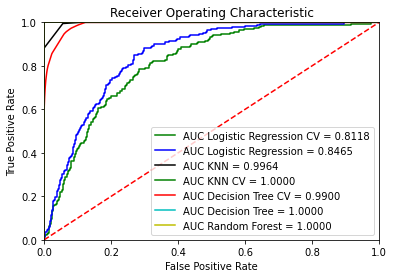

In [614]:
# ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

#Random Forest
fpr_rf, tpr_rf, threshold_rf = roc_curve(y_train,
                                         y_pred_train_proba_rf[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

#Decision Tree
fpr_dt, tpr_dt, threshold_dt = roc_curve(y_train,
                                         y_pred_train_proba_dt[:, 1])
roc_auc_dt = auc(fpr_dt, tpr_dt)

#Decision Tree CV
fpr_dt_ver_1, tpr_dt_ver_1, threshold_dt_ver_1 = roc_curve(y_train,
                                                              y_pred_train_proba_dt_ver_1[:, 1])
roc_auc_dt_ver_1 = auc(fpr_dt_ver_1, tpr_dt_ver_1)


#KNN CV
fpr_knn_ver_1, tpr_knn_ver_1, threshold_knn_ver_1 = roc_curve(y_train,
                                                              y_pred_train_proba_knn_ver1[:, 1])
roc_auc_knn_ver_1 = auc(fpr_knn_ver_1, tpr_knn_ver_1)

#KNN
fpr_knn, tpr_knn, threshold_knn = roc_curve(y_train,
                                            y_pred_train_proba_knn[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

#Logistic Regression
fpr_logreg, tpr_logreg, threshold_logreg = roc_curve(y_train,
                                                    y_pred_train_proba_logreg[:, 1])
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

#Logistic Regression CV
fpr_logreg_ver_1, tpr_logreg_ver_1, threshold_logreg_ver_1 = roc_curve(y_train,
                                                                      y_pred_train_proba_logreg_ver_1[:,1])
roc_auc_logreg_ver_1 = auc(fpr_logreg_ver_1, tpr_logreg_ver_1)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_logreg_ver_1, tpr_logreg_ver_1, 'g', label = 'AUC Logistic Regression CV = %0.4f' % roc_auc_logreg_ver_1)
plt.plot(fpr_logreg, tpr_logreg, 'b', label = 'AUC Logistic Regression = %0.4f' % roc_auc_logreg)
plt.plot(fpr_knn, tpr_knn, 'k', label = 'AUC KNN = %0.4f' % roc_auc_knn)
plt.plot(fpr_knn_ver_1, tpr_knn_ver_1, 'g', label = 'AUC KNN CV = %0.4f' % roc_auc_knn_ver_1)
plt.plot(fpr_dt_ver_1, tpr_dt_ver_1, 'r', label = 'AUC Decision Tree CV = %0.4f' % roc_auc_dt_ver_1)
plt.plot(fpr_dt, tpr_dt, 'c', label = 'AUC Decision Tree = %0.4f' % roc_auc_dt)
plt.plot(fpr_rf, tpr_rf, 'y', label = 'AUC Random Forest = %0.4f' % roc_auc_rf)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [615]:
# Tampilkan confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true = y_train,
                 y_pred = predicted_logreg)

# [[tp, fp]]
# [[fn, tn]]

array([[2710,  935],
       [  37,  150]], dtype=int64)

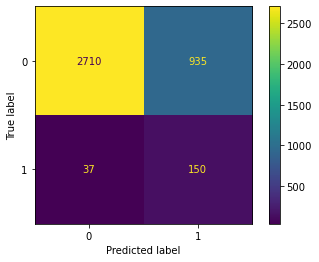

In [718]:
ConfusionMatrixDisplay.from_predictions(y_train, predicted_logreg)

In [626]:
# Tampilkan confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true = y_train,
                 y_pred = predicted_knn)

# [[tp, fp]]
# [[fn, tn]]

array([[3248,  397],
       [   0,  187]], dtype=int64)

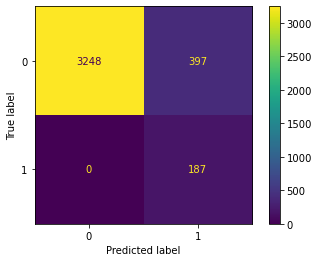

In [717]:
ConfusionMatrixDisplay.from_predictions(y_train, predicted_knn)

In [628]:
# Tampilkan confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true = y_train,
                 y_pred = predicted_svm)

# [[tp, fp]]
# [[fn, tn]]

array([[3070,  575],
       [  19,  168]], dtype=int64)

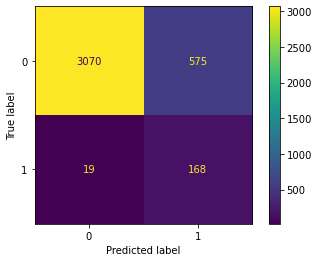

In [716]:
ConfusionMatrixDisplay.from_predictions(y_train, predicted_svm)

In [630]:
# Tampilkan confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true = y_train,
                 y_pred = predicted_dt)

# [[tp, fp]]
# [[fn, tn]]

array([[3645,    0],
       [   0,  187]], dtype=int64)

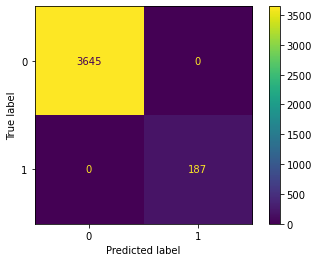

In [715]:
ConfusionMatrixDisplay.from_predictions(y_train, predicted_dt)

In [631]:
# Tampilkan confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true = y_train,
                 y_pred = predicted_rf)

# [[tp, fp]]
# [[fn, tn]]

array([[3645,    0],
       [   0,  187]], dtype=int64)

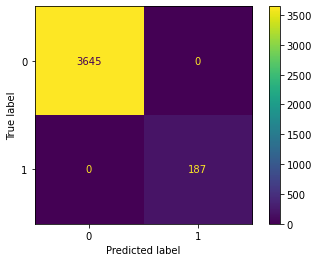

In [714]:
ConfusionMatrixDisplay.from_predictions(y_train, predicted_rf)

In [638]:
# Tampilkan confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true = y_train,
                 y_pred = predicted_cvknn)

# [[tp, fp]]
# [[fn, tn]]

array([[3645,    0],
       [   0,  187]], dtype=int64)

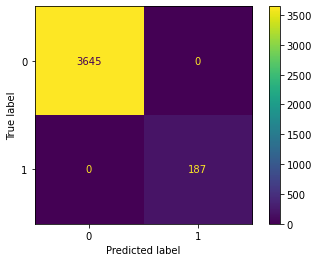

In [713]:
ConfusionMatrixDisplay.from_predictions(y_train, predicted_cvknn)

In [639]:
# Tampilkan confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true = y_train,
                 y_pred = predicted_cvlogreg)

# [[tp, fp]]
# [[fn, tn]]

array([[3645,    0],
       [ 187,    0]], dtype=int64)

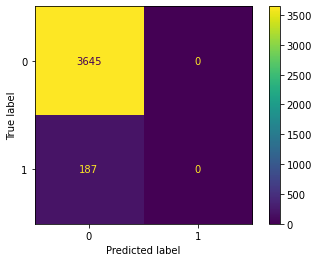

In [712]:
ConfusionMatrixDisplay.from_predictions(y_train, predicted_cvlogreg)

### Classification Report - Random Under Sampling

In [488]:
# Classification report Logistic Regression
from sklearn.metrics import classification_report

print(classification_report(y_true = y_rus,
                            y_pred = predicted_logreg_rus,
                            target_names = ["not stroke", "stroke"]))

              precision    recall  f1-score   support

  not stroke       0.80      0.79      0.80       187
      stroke       0.79      0.80      0.80       187

    accuracy                           0.80       374
   macro avg       0.80      0.80      0.80       374
weighted avg       0.80      0.80      0.80       374



In [489]:
# Classification report K Nearest Neighbor
print(classification_report(y_true = y_rus,
                            y_pred = predicted_knn_rus,
                            target_names = ["not stroke", "stroke"]))

              precision    recall  f1-score   support

  not stroke       1.00      0.91      0.96       187
      stroke       0.92      1.00      0.96       187

    accuracy                           0.96       374
   macro avg       0.96      0.96      0.96       374
weighted avg       0.96      0.96      0.96       374



In [490]:
# Classification report Support Vector Machine
print(classification_report(y_true = y_rus,
                            y_pred = predicted_svm_rus,
                            target_names = ["not stroke", "stroke"]))

              precision    recall  f1-score   support

  not stroke       0.90      0.87      0.88       187
      stroke       0.88      0.90      0.89       187

    accuracy                           0.89       374
   macro avg       0.89      0.89      0.89       374
weighted avg       0.89      0.89      0.89       374



In [491]:
# Classification report Decision Tree
print(classification_report(y_true = y_rus,
                            y_pred = predicted_dt_rus,
                            target_names = ["not stroke", "stroke"]))

              precision    recall  f1-score   support

  not stroke       1.00      1.00      1.00       187
      stroke       1.00      1.00      1.00       187

    accuracy                           1.00       374
   macro avg       1.00      1.00      1.00       374
weighted avg       1.00      1.00      1.00       374



In [492]:
# Classification report Random Forest
print(classification_report(y_true = y_rus,
                            y_pred = predicted_rf_rus,
                            target_names = ["not stroke", "stroke"]))

              precision    recall  f1-score   support

  not stroke       1.00      1.00      1.00       187
      stroke       1.00      1.00      1.00       187

    accuracy                           1.00       374
   macro avg       1.00      1.00      1.00       374
weighted avg       1.00      1.00      1.00       374



In [1062]:
# Classification report Cross Validation Decision Tree 
print(classification_report(y_true = y_rus,
                            y_pred = predicted_cvdt_rus,
                            target_names = ["not stroke", "stroke"]))

              precision    recall  f1-score   support

  not stroke       0.77      1.00      0.87       187
      stroke       1.00      0.70      0.82       187

    accuracy                           0.85       374
   macro avg       0.88      0.85      0.84       374
weighted avg       0.88      0.85      0.84       374



In [1063]:
# Classification report Cross Validation KNN
print(classification_report(y_true = y_rus,
                            y_pred = predicted_cvknn_rus,
                            target_names = ["not stroke", "stroke"]))

              precision    recall  f1-score   support

  not stroke       0.54      1.00      0.70       187
      stroke       1.00      0.16      0.28       187

    accuracy                           0.58       374
   macro avg       0.77      0.58      0.49       374
weighted avg       0.77      0.58      0.49       374



In [1064]:
# Classification report Cross Validation Logistic Regression
print(classification_report(y_true = y_rus,
                            y_pred = predicted_cvlogreg_rus,
                            target_names = ["not stroke", "stroke"]))

              precision    recall  f1-score   support

  not stroke       0.50      1.00      0.67       187
      stroke       0.00      0.00      0.00       187

    accuracy                           0.50       374
   macro avg       0.25      0.50      0.33       374
weighted avg       0.25      0.50      0.33       374



#### Plotting terhadap Probability

In [661]:
# Buat prediksi probability Logistic Regression
y_pred_train_proba_logreg = logreg.predict_proba(x_rus)

# Buat prediksi probability Logistic Regression CV
y_pred_train_proba_logreg_ver_1 = best_logreg.predict_proba(x_rus)

# Buat prediksi probability KNN
y_pred_train_proba_knn = knn.predict_proba(x_rus)

# Buat prediksi probability KNN CV
y_pred_train_proba_knn_ver1 = best_knn.predict_proba(x_rus)

# Buat prediksi probability Decision Tree
y_pred_train_proba_dt = decision_tree.predict_proba(x_rus)

# Buat prediksi probability Decision Tree CV
y_pred_train_proba_dt_ver_1 = best_decTree.predict_proba(x_rus)

# Buat prediksi probability Support Vector Machine
y_pred_train_proba_rf = random_forest.predict_proba(x_rus)

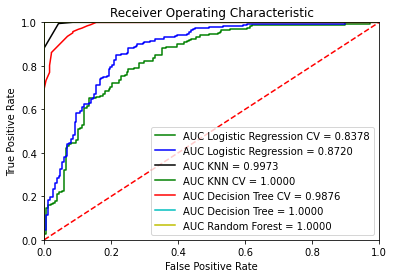

In [662]:
# ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

#Random Forest
fpr_rf, tpr_rf, threshold_rf = roc_curve(y_rus,
                                         y_pred_train_proba_rf[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

#Decision Tree
fpr_dt, tpr_dt, threshold_dt = roc_curve(y_rus,
                                         y_pred_train_proba_dt[:, 1])
roc_auc_dt = auc(fpr_dt, tpr_dt)

#Decision Tree CV
fpr_dt_ver_1, tpr_dt_ver_1, threshold_dt_ver_1 = roc_curve(y_rus,
                                                              y_pred_train_proba_dt_ver_1[:, 1])
roc_auc_dt_ver_1 = auc(fpr_dt_ver_1, tpr_dt_ver_1)


#KNN CV
fpr_knn_ver_1, tpr_knn_ver_1, threshold_knn_ver_1 = roc_curve(y_rus,
                                                              y_pred_train_proba_knn_ver1[:, 1])
roc_auc_knn_ver_1 = auc(fpr_knn_ver_1, tpr_knn_ver_1)

#KNN
fpr_knn, tpr_knn, threshold_knn = roc_curve(y_rus,
                                            y_pred_train_proba_knn[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

#Logistic Regression
fpr_logreg, tpr_logreg, threshold_logreg = roc_curve(y_rus,
                                                    y_pred_train_proba_logreg[:, 1])
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

#Logistic Regression CV
fpr_logreg_ver_1, tpr_logreg_ver_1, threshold_logreg_ver_1 = roc_curve(y_rus,
                                                                      y_pred_train_proba_logreg_ver_1[:,1])
roc_auc_logreg_ver_1 = auc(fpr_logreg_ver_1, tpr_logreg_ver_1)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_logreg_ver_1, tpr_logreg_ver_1, 'g', label = 'AUC Logistic Regression CV = %0.4f' % roc_auc_logreg_ver_1)
plt.plot(fpr_logreg, tpr_logreg, 'b', label = 'AUC Logistic Regression = %0.4f' % roc_auc_logreg)
plt.plot(fpr_knn, tpr_knn, 'k', label = 'AUC KNN = %0.4f' % roc_auc_knn)
plt.plot(fpr_knn_ver_1, tpr_knn_ver_1, 'g', label = 'AUC KNN CV = %0.4f' % roc_auc_knn_ver_1)
plt.plot(fpr_dt_ver_1, tpr_dt_ver_1, 'r', label = 'AUC Decision Tree CV = %0.4f' % roc_auc_dt_ver_1)
plt.plot(fpr_dt, tpr_dt, 'c', label = 'AUC Decision Tree = %0.4f' % roc_auc_dt)
plt.plot(fpr_rf, tpr_rf, 'y', label = 'AUC Random Forest = %0.4f' % roc_auc_rf)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [625]:
# Tampilkan confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true = y_rus,
                 y_pred = predicted_logreg_rus)

# [[tp, fp]]
# [[fn, tn]]

array([[148,  39],
       [ 37, 150]], dtype=int64)

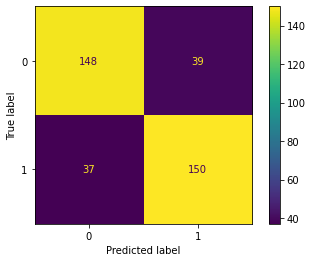

In [711]:
ConfusionMatrixDisplay.from_predictions(y_rus, predicted_logreg_rus)

In [640]:
# Tampilkan confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true = y_rus,
                 y_pred = predicted_knn_rus)

# [[tp, fp]]
# [[fn, tn]]

array([[171,  16],
       [  0, 187]], dtype=int64)

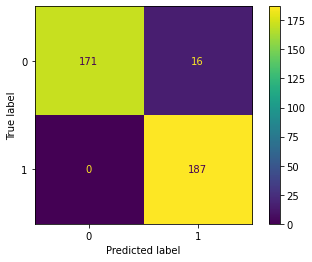

In [710]:
ConfusionMatrixDisplay.from_predictions(y_rus, predicted_knn_rus)

In [641]:
# Tampilkan confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true = y_rus,
                 y_pred = predicted_svm_rus)

# [[tp, fp]]
# [[fn, tn]]

array([[163,  24],
       [ 19, 168]], dtype=int64)

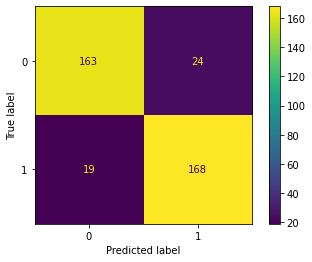

In [709]:
ConfusionMatrixDisplay.from_predictions(y_rus, predicted_svm_rus)

In [642]:
# Tampilkan confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true = y_rus,
                 y_pred = predicted_dt_rus)

# [[tp, fp]]
# [[fn, tn]]

array([[187,   0],
       [  0, 187]], dtype=int64)

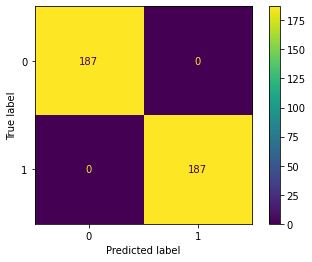

In [708]:
ConfusionMatrixDisplay.from_predictions(y_rus, predicted_dt_rus)

In [643]:
# Tampilkan confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true = y_rus,
                 y_pred = predicted_rf_rus)

# [[tp, fp]]
# [[fn, tn]]

array([[187,   0],
       [  0, 187]], dtype=int64)

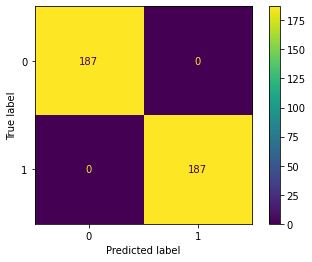

In [707]:
ConfusionMatrixDisplay.from_predictions(y_rus, predicted_rf_rus)

### Classification Report - Random Over Sampling

In [493]:
# Classification report Logistic Regression
from sklearn.metrics import classification_report

print(classification_report(y_true = y_ros,
                            y_pred = predicted_logreg_ros,
                            target_names = ["not stroke", "stroke"]))

              precision    recall  f1-score   support

  not stroke       0.79      0.74      0.77      3645
      stroke       0.76      0.81      0.78      3645

    accuracy                           0.77      7290
   macro avg       0.78      0.77      0.77      7290
weighted avg       0.78      0.77      0.77      7290



In [494]:
# Classification report K Nearest Neighbor
print(classification_report(y_true = y_ros,
                            y_pred = predicted_knn_ros,
                            target_names = ["not stroke", "stroke"]))

              precision    recall  f1-score   support

  not stroke       1.00      0.89      0.94      3645
      stroke       0.90      1.00      0.95      3645

    accuracy                           0.95      7290
   macro avg       0.95      0.95      0.95      7290
weighted avg       0.95      0.95      0.95      7290



In [495]:
# Classification report Support Vector Machine
print(classification_report(y_true = y_ros,
                            y_pred = predicted_svm_ros,
                            target_names = ["not stroke", "stroke"]))

              precision    recall  f1-score   support

  not stroke       0.89      0.84      0.87      3645
      stroke       0.85      0.90      0.88      3645

    accuracy                           0.87      7290
   macro avg       0.87      0.87      0.87      7290
weighted avg       0.87      0.87      0.87      7290



In [496]:
# Classification report Decision Tree
print(classification_report(y_true = y_ros,
                            y_pred = predicted_dt_ros,
                            target_names = ["not stroke", "stroke"]))

              precision    recall  f1-score   support

  not stroke       1.00      1.00      1.00      3645
      stroke       1.00      1.00      1.00      3645

    accuracy                           1.00      7290
   macro avg       1.00      1.00      1.00      7290
weighted avg       1.00      1.00      1.00      7290



In [1065]:
# Classification report Random Forest
print(classification_report(y_true = y_ros,
                            y_pred = predicted_rf_ros,
                            target_names = ["not stroke", "stroke"]))

              precision    recall  f1-score   support

  not stroke       1.00      1.00      1.00      3645
      stroke       1.00      1.00      1.00      3645

    accuracy                           1.00      7290
   macro avg       1.00      1.00      1.00      7290
weighted avg       1.00      1.00      1.00      7290



In [1066]:
# Classification report Cross Validation Decision Tree 
print(classification_report(y_true = y_ros,
                            y_pred = predicted_cvdt_ros,
                            target_names = ["not stroke", "stroke"]))

              precision    recall  f1-score   support

  not stroke       0.76      1.00      0.87      3645
      stroke       1.00      0.69      0.82      3645

    accuracy                           0.85      7290
   macro avg       0.88      0.85      0.84      7290
weighted avg       0.88      0.85      0.84      7290



In [1067]:
# Classification report Cross Validation KNN
print(classification_report(y_true = y_ros,
                            y_pred = predicted_cvknn_ros,
                            target_names = ["not stroke", "stroke"]))

              precision    recall  f1-score   support

  not stroke       0.54      0.99      0.70      3645
      stroke       0.97      0.16      0.28      3645

    accuracy                           0.58      7290
   macro avg       0.76      0.58      0.49      7290
weighted avg       0.76      0.58      0.49      7290



In [1068]:
# Classification report Cross Validation Logistic Regression
print(classification_report(y_true = y_ros,
                            y_pred = predicted_cvlogreg_ros,
                            target_names = ["not stroke", "stroke"]))

              precision    recall  f1-score   support

  not stroke       0.50      1.00      0.67      3645
      stroke       0.00      0.00      0.00      3645

    accuracy                           0.50      7290
   macro avg       0.25      0.50      0.33      7290
weighted avg       0.25      0.50      0.33      7290



#### Plotting terhadap Probability

In [663]:
# Buat prediksi probability Logistic Regression
y_pred_train_proba_logreg = logreg.predict_proba(x_ros)

# Buat prediksi probability Logistic Regression CV
y_pred_train_proba_logreg_ver_1 = best_logreg.predict_proba(x_ros)

# Buat prediksi probability KNN
y_pred_train_proba_knn = knn.predict_proba(x_ros)

# Buat prediksi probability KNN CV
y_pred_train_proba_knn_ver1 = best_knn.predict_proba(x_ros)

# Buat prediksi probability Decision Tree
y_pred_train_proba_dt = decision_tree.predict_proba(x_ros)

# Buat prediksi probability Decision Tree CV
y_pred_train_proba_dt_ver_1 = best_decTree.predict_proba(x_ros)

# Buat prediksi probability Support Vector Machine
y_pred_train_proba_rf = random_forest.predict_proba(x_ros)

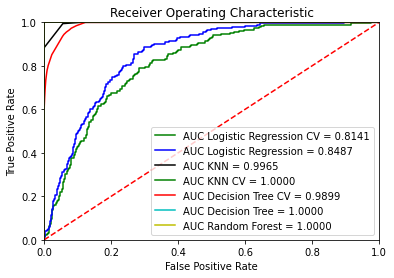

In [664]:
# ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

#Random Forest
fpr_rf, tpr_rf, threshold_rf = roc_curve(y_ros,
                                         y_pred_train_proba_rf[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

#Decision Tree
fpr_dt, tpr_dt, threshold_dt = roc_curve(y_ros,
                                         y_pred_train_proba_dt[:, 1])
roc_auc_dt = auc(fpr_dt, tpr_dt)

#Decision Tree CV
fpr_dt_ver_1, tpr_dt_ver_1, threshold_dt_ver_1 = roc_curve(y_ros,
                                                              y_pred_train_proba_dt_ver_1[:, 1])
roc_auc_dt_ver_1 = auc(fpr_dt_ver_1, tpr_dt_ver_1)


#KNN CV
fpr_knn_ver_1, tpr_knn_ver_1, threshold_knn_ver_1 = roc_curve(y_ros,
                                                              y_pred_train_proba_knn_ver1[:, 1])
roc_auc_knn_ver_1 = auc(fpr_knn_ver_1, tpr_knn_ver_1)

#KNN
fpr_knn, tpr_knn, threshold_knn = roc_curve(y_ros,
                                            y_pred_train_proba_knn[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

#Logistic Regression
fpr_logreg, tpr_logreg, threshold_logreg = roc_curve(y_ros,
                                                    y_pred_train_proba_logreg[:, 1])
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

#Logistic Regression CV
fpr_logreg_ver_1, tpr_logreg_ver_1, threshold_logreg_ver_1 = roc_curve(y_ros,
                                                                      y_pred_train_proba_logreg_ver_1[:,1])
roc_auc_logreg_ver_1 = auc(fpr_logreg_ver_1, tpr_logreg_ver_1)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_logreg_ver_1, tpr_logreg_ver_1, 'g', label = 'AUC Logistic Regression CV = %0.4f' % roc_auc_logreg_ver_1)
plt.plot(fpr_logreg, tpr_logreg, 'b', label = 'AUC Logistic Regression = %0.4f' % roc_auc_logreg)
plt.plot(fpr_knn, tpr_knn, 'k', label = 'AUC KNN = %0.4f' % roc_auc_knn)
plt.plot(fpr_knn_ver_1, tpr_knn_ver_1, 'g', label = 'AUC KNN CV = %0.4f' % roc_auc_knn_ver_1)
plt.plot(fpr_dt_ver_1, tpr_dt_ver_1, 'r', label = 'AUC Decision Tree CV = %0.4f' % roc_auc_dt_ver_1)
plt.plot(fpr_dt, tpr_dt, 'c', label = 'AUC Decision Tree = %0.4f' % roc_auc_dt)
plt.plot(fpr_rf, tpr_rf, 'y', label = 'AUC Random Forest = %0.4f' % roc_auc_rf)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [646]:
# Tampilkan confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true = y_ros,
                 y_pred = predicted_logreg_ros)

# [[tp, fp]]
# [[fn, tn]]

array([[2710,  935],
       [ 709, 2936]], dtype=int64)

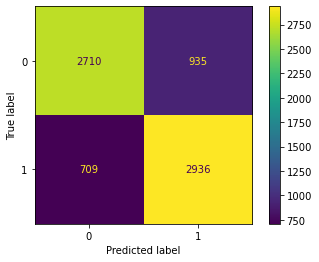

In [706]:
ConfusionMatrixDisplay.from_predictions(y_ros, predicted_logreg_ros)

In [647]:
# Tampilkan confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true = y_ros,
                 y_pred = predicted_knn_ros)

# [[tp, fp]]
# [[fn, tn]]

array([[3248,  397],
       [   0, 3645]], dtype=int64)

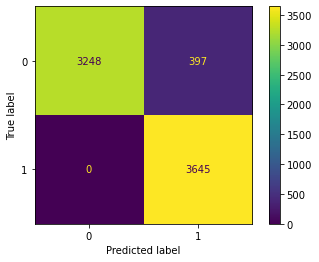

In [705]:
ConfusionMatrixDisplay.from_predictions(y_ros, predicted_knn_ros)

In [648]:
# Tampilkan confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true = y_ros,
                 y_pred = predicted_svm_ros)

# [[tp, fp]]
# [[fn, tn]]

array([[3070,  575],
       [ 361, 3284]], dtype=int64)

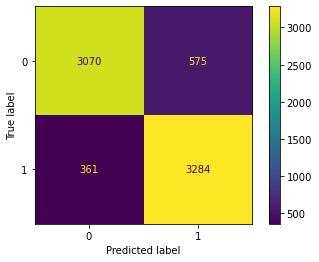

In [704]:
ConfusionMatrixDisplay.from_predictions(y_ros, predicted_svm_ros)

In [702]:
# Tampilkan confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true = y_ros,
                 y_pred = predicted_dt_ros)

# [[tp, fp]]
# [[fn, tn]]

array([[3645,    0],
       [   0, 3645]], dtype=int64)

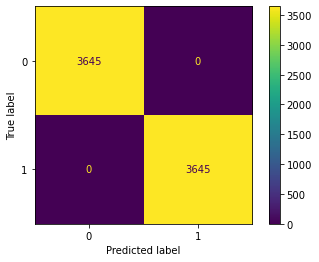

In [703]:
ConfusionMatrixDisplay.from_predictions(y_ros, predicted_rf_ros)

In [652]:
# Tampilkan confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true = y_ros,
                 y_pred = predicted_rf_ros)

# [[tp, fp]]
# [[fn, tn]]

array([[3645,    0],
       [   0, 3645]], dtype=int64)

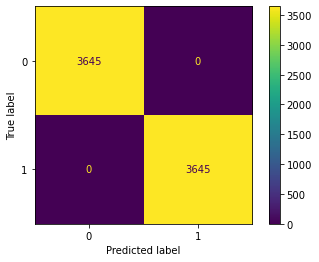

In [691]:
ConfusionMatrixDisplay.from_predictions(y_ros, predicted_rf_ros)

### Classification Report - Over Sampling SMOTE

In [498]:
# Classification report Logistic Regression
from sklearn.metrics import classification_report

print(classification_report(y_true = y_sm,
                            y_pred = predicted_logreg_sm,
                            target_names = ["not stroke", "stroke"]))

              precision    recall  f1-score   support

  not stroke       0.83      0.74      0.78      3645
      stroke       0.77      0.85      0.81      3645

    accuracy                           0.80      7290
   macro avg       0.80      0.80      0.79      7290
weighted avg       0.80      0.80      0.79      7290



In [499]:
# Classification report K Nearest Neighbor
print(classification_report(y_true = y_sm,
                            y_pred = predicted_knn_sm,
                            target_names = ["not stroke", "stroke"]))

              precision    recall  f1-score   support

  not stroke       1.00      0.89      0.94      3645
      stroke       0.90      1.00      0.95      3645

    accuracy                           0.94      7290
   macro avg       0.95      0.94      0.94      7290
weighted avg       0.95      0.94      0.94      7290



In [500]:
# Classification report Support Vector Machine
print(classification_report(y_true = y_sm,
                            y_pred = predicted_svm_sm,
                            target_names = ["not stroke", "stroke"]))

              precision    recall  f1-score   support

  not stroke       0.96      0.84      0.90      3645
      stroke       0.86      0.96      0.91      3645

    accuracy                           0.90      7290
   macro avg       0.91      0.90      0.90      7290
weighted avg       0.91      0.90      0.90      7290



In [501]:
# Classification report Decision Tree
print(classification_report(y_true = y_sm,
                            y_pred = predicted_dt_sm,
                            target_names = ["not stroke", "stroke"]))

              precision    recall  f1-score   support

  not stroke       1.00      1.00      1.00      3645
      stroke       1.00      1.00      1.00      3645

    accuracy                           1.00      7290
   macro avg       1.00      1.00      1.00      7290
weighted avg       1.00      1.00      1.00      7290



In [502]:
# Classification report Random Forest
print(classification_report(y_true = y_sm,
                            y_pred = predicted_rf_sm,
                            target_names = ["not stroke", "stroke"]))

              precision    recall  f1-score   support

  not stroke       1.00      1.00      1.00      3645
      stroke       1.00      1.00      1.00      3645

    accuracy                           1.00      7290
   macro avg       1.00      1.00      1.00      7290
weighted avg       1.00      1.00      1.00      7290



In [1069]:
# Classification report Cross Validation Decision Tree 
print(classification_report(y_true = y_sm,
                            y_pred = predicted_cvdt_sm,
                            target_names = ["not stroke", "stroke"]))

              precision    recall  f1-score   support

  not stroke       0.59      1.00      0.74      3645
      stroke       0.99      0.31      0.47      3645

    accuracy                           0.65      7290
   macro avg       0.79      0.65      0.61      7290
weighted avg       0.79      0.65      0.61      7290



In [1070]:
# Classification report Cross Validation KNN
print(classification_report(y_true = y_sm,
                            y_pred = predicted_cvknn_sm,
                            target_names = ["not stroke", "stroke"]))

              precision    recall  f1-score   support

  not stroke       0.56      0.99      0.72      3645
      stroke       0.98      0.22      0.36      3645

    accuracy                           0.61      7290
   macro avg       0.77      0.61      0.54      7290
weighted avg       0.77      0.61      0.54      7290



In [1071]:
# Classification report Cross Validation Logistic Regression
print(classification_report(y_true = y_sm,
                            y_pred = predicted_cvlogreg_sm,
                            target_names = ["not stroke", "stroke"]))

              precision    recall  f1-score   support

  not stroke       0.50      1.00      0.67      3645
      stroke       0.00      0.00      0.00      3645

    accuracy                           0.50      7290
   macro avg       0.25      0.50      0.33      7290
weighted avg       0.25      0.50      0.33      7290



#### Plotting terhadap Probability

In [1072]:
# Buat prediksi probability Logistic Regression
y_pred_train_proba_logreg = logreg.predict_proba(x_sm)

# Buat prediksi probability Logistic Regression CV
y_pred_train_proba_logreg_ver_1 = best_logreg.predict_proba(x_sm)

# Buat prediksi probability KNN
y_pred_train_proba_knn = knn.predict_proba(x_sm)

# Buat prediksi probability KNN CV
y_pred_train_proba_knn_ver1 = best_knn.predict_proba(x_sm)

# Buat prediksi probability Decision Tree
y_pred_train_proba_dt = decision_tree.predict_proba(x_sm)

# Buat prediksi probability Decision Tree CV
y_pred_train_proba_dt_ver_1 = best_decTree.predict_proba(x_sm)

# Buat prediksi probability Support Vector Machine
y_pred_train_proba_rf = random_forest.predict_proba(x_sm)

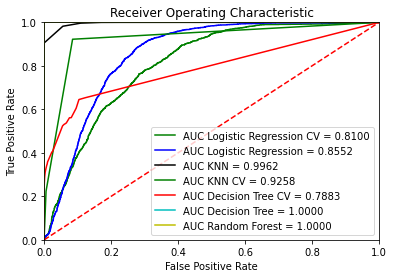

In [1073]:
# ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

#Random Forest
fpr_rf, tpr_rf, threshold_rf = roc_curve(y_sm,
                                         y_pred_train_proba_rf[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

#Decision Tree
fpr_dt, tpr_dt, threshold_dt = roc_curve(y_sm,
                                         y_pred_train_proba_dt[:, 1])
roc_auc_dt = auc(fpr_dt, tpr_dt)

#Decision Tree CV
fpr_dt_ver_1, tpr_dt_ver_1, threshold_dt_ver_1 = roc_curve(y_sm,
                                                              y_pred_train_proba_dt_ver_1[:, 1])
roc_auc_dt_ver_1 = auc(fpr_dt_ver_1, tpr_dt_ver_1)


#KNN CV
fpr_knn_ver_1, tpr_knn_ver_1, threshold_knn_ver_1 = roc_curve(y_sm,
                                                              y_pred_train_proba_knn_ver1[:, 1])
roc_auc_knn_ver_1 = auc(fpr_knn_ver_1, tpr_knn_ver_1)

#KNN
fpr_knn, tpr_knn, threshold_knn = roc_curve(y_sm,
                                            y_pred_train_proba_knn[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

#Logistic Regression
fpr_logreg, tpr_logreg, threshold_logreg = roc_curve(y_sm,
                                                    y_pred_train_proba_logreg[:, 1])
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

#Logistic Regression CV
fpr_logreg_ver_1, tpr_logreg_ver_1, threshold_logreg_ver_1 = roc_curve(y_sm,
                                                                      y_pred_train_proba_logreg_ver_1[:,1])
roc_auc_logreg_ver_1 = auc(fpr_logreg_ver_1, tpr_logreg_ver_1)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_logreg_ver_1, tpr_logreg_ver_1, 'g', label = 'AUC Logistic Regression CV = %0.4f' % roc_auc_logreg_ver_1)
plt.plot(fpr_logreg, tpr_logreg, 'b', label = 'AUC Logistic Regression = %0.4f' % roc_auc_logreg)
plt.plot(fpr_knn, tpr_knn, 'k', label = 'AUC KNN = %0.4f' % roc_auc_knn)
plt.plot(fpr_knn_ver_1, tpr_knn_ver_1, 'g', label = 'AUC KNN CV = %0.4f' % roc_auc_knn_ver_1)
plt.plot(fpr_dt_ver_1, tpr_dt_ver_1, 'r', label = 'AUC Decision Tree CV = %0.4f' % roc_auc_dt_ver_1)
plt.plot(fpr_dt, tpr_dt, 'c', label = 'AUC Decision Tree = %0.4f' % roc_auc_dt)
plt.plot(fpr_rf, tpr_rf, 'y', label = 'AUC Random Forest = %0.4f' % roc_auc_rf)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [692]:
# Tampilkan confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true = y_sm,
                 y_pred = predicted_logreg_sm)

# [[tp, fp]]
# [[fn, tn]]

array([[2710,  935],
       [ 556, 3089]], dtype=int64)

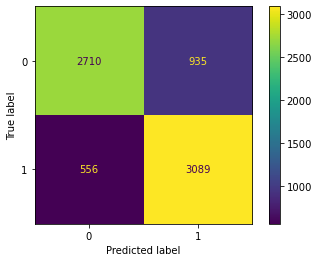

In [693]:
ConfusionMatrixDisplay.from_predictions(y_sm, predicted_logreg_sm)

In [695]:
# Tampilkan confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true = y_sm,
                 y_pred = predicted_knn_sm)

# [[tp, fp]]
# [[fn, tn]]

array([[3248,  397],
       [  13, 3632]], dtype=int64)

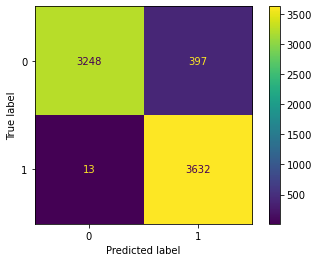

In [696]:
ConfusionMatrixDisplay.from_predictions(y_sm, predicted_knn_sm)

In [697]:
# Tampilkan confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true = y_sm,
                 y_pred = predicted_svm_sm)

# [[tp, fp]]
# [[fn, tn]]

array([[3070,  575],
       [ 143, 3502]], dtype=int64)

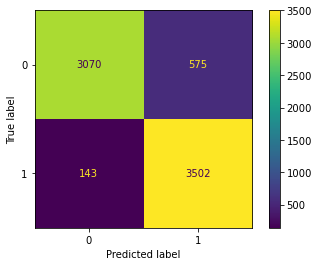

In [698]:
ConfusionMatrixDisplay.from_predictions(y_sm, predicted_svm_sm)

In [658]:
# Tampilkan confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true = y_sm,
                 y_pred = predicted_dt_sm)

# [[tp, fp]]
# [[fn, tn]]

array([[3645,    0],
       [   0, 3645]], dtype=int64)

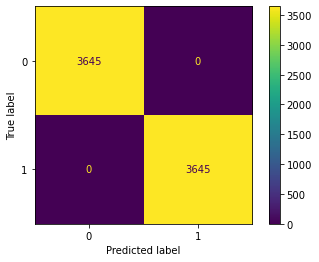

In [699]:
ConfusionMatrixDisplay.from_predictions(y_sm, predicted_dt_sm)

In [701]:
# Tampilkan confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true = y_sm,
                 y_pred = predicted_rf_sm)

# [[tp, fp]]
# [[fn, tn]]

array([[3645,    0],
       [   0, 3645]], dtype=int64)

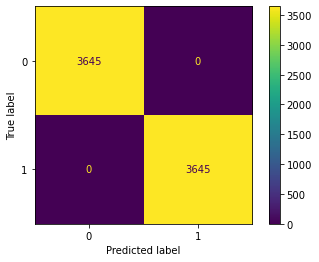

In [700]:
ConfusionMatrixDisplay.from_predictions(y_sm, predicted_rf_sm)

### **5. Simpan model ke file pickle**

In [503]:
import joblib

# Simpan model logreg ke dalam folder yang sama dengan notebook
joblib.dump(logreg, "models/logreg.pkl")
joblib.dump(knn, "models/knn.pkl")
joblib.dump(svc, "models/svc.pkl")
joblib.dump(decision_tree, "models/decision_tree.pkl")
joblib.dump(random_forest, "models/random_forest.pkl")

['random_forest.pkl']

### **6. Test Prediction**

1. Siapkan file test dataset
2. Lakukan preprocessing yang sama dengan yang dilakukan di train dataset
3. gunakan `imputer_numerical` dan `standardizer` yang telah di-fit di train dataset

In [1084]:
def extractTest(data,
                numerical_column, categorical_column, categorical_column_ohe, categorical_column_le, ohe_column,
                imputer_numerical, standardizer):
    """
    Fungsi untuk mengekstrak & membersihkan test data 
    :param data: <pandas dataframe> sampel data test
    :param numerical_column: <list> kolom numerik
    :param categorical_column: <list> kolom kategorik
    :param ohe_column: <list> kolom one-hot-encoding dari data kategorik
    :param imputer_numerical: <sklearn method> imputer data numerik
    :param standardizer: <sklearn method> standardizer data
    :return cleaned_data: <pandas dataframe> data final
    """
    # Filter data
    numerical_data = data[numerical_column]
    categorical_data = data[categorical_column]
    categorical_data_ohe = data[categorical_column_ohe]
    categorical_data_le = data[categorical_column_le]

    # Proses data numerik
    numerical_data = pd.DataFrame(imputer_numerical.transform(numerical_data))
    numerical_data.columns = numerical_column
    numerical_data.index = data.index

    # Proses data kategorik OHE
    categorical_data_ohe = categorical_data_ohe.fillna(value="Kosong")
    categorical_data_ohe.index = data.index
    categorical_data_ohe = pd.get_dummies(categorical_data_ohe)
    categorical_data_ohe.reindex(index = categorical_data_ohe.index, 
                             columns = ohe_column)
    
    # Proses data kategorik LE
    categorical_data_le = categorical_data_le.fillna(value="Kosong")
    categorical_data_le.index = data.index
    categorical_data_le = categorical_data_le.apply(le.fit_transform)
    categorical_data_le.reindex(index = categorical_data_le.index, 
                             columns = ohe_column)

    # Gabungkan data
    concat_data = pd.concat([numerical_data, categorical_data_le, categorical_data_ohe],
                             axis = 1)
    cleaned_data = pd.DataFrame(standardizer.transform(concat_data))
    cleaned_data.columns = concat_data.columns

    return cleaned_data

In [1085]:
def testPrediction(X_test, y_test, classifier, compute_score):
    """
    Fungsi untuk mendapatkan prediksi dari model
    :param X_test: <pandas dataframe> input
    :param y_test: <pandas series> output/target
    :param classifier: <sklearn method> model klasifikasi
    :param compute_score: <bool> True: menampilkan score, False: tidak
    :return test_predict: <list> hasil prediksi data input
    :return score: <float> akurasi model
    """
    if compute_score:
        score = classifier.score(X_test, y_test)
        print(f"Accuracy : {score:.4f}")

    test_predict = classifier.predict(X_test)

    return test_predict, score

In [1086]:
X_test_clean = extractTest(data = X_test,
                           numerical_column = numerical_column,
                           categorical_column = categorical_column,
                           categorical_column_ohe = categorical_ohe_columns,
                           categorical_column_le = categorical_le_columns,
                           ohe_column = ohe_columns,
                           imputer_numerical = imputer_numerical,
                           standardizer = standardizer)

In [1087]:
y_test = y_test.apply(le.fit_transform)

In [1088]:
y_test

,stroke
1777,0
3192,1
1982,0
5046,0
4781,1
...,...
4519,0
5031,0
3598,0
2935,0


#### Accuracy Performance

In [1089]:
# Logistic Regression Performance
logreg_test_predict, score = testPrediction(X_test = X_test_clean,
                                            y_test = y_test,
                                            classifier = logreg,
                                            compute_score = True)

Accuracy : 0.7668


In [510]:
# K nearest neighbor Performance
knn_test_predict, score = testPrediction(X_test = X_test_clean,
                                         y_test = y_test,
                                         classifier = knn,
                                         compute_score = True)

Accuracy : 0.8177


In [511]:
# Support Vector Machine Performance
svm_test_predict, score = testPrediction(X_test = X_test_clean,
                                         y_test = y_test,
                                         classifier = svc,
                                         compute_score = True)

Accuracy : 0.8177


In [512]:
# Decision Tree Performance
dt_test_predict, score = testPrediction(X_test = X_test_clean,
                                         y_test = y_test,
                                         classifier = decision_tree,
                                         compute_score = True)

Accuracy : 0.8818


In [513]:
# Random Forest Performance
rf_test_predict, score = testPrediction(X_test = X_test_clean,
                                        y_test = y_test,
                                        classifier = random_forest,
                                        compute_score = True)

Accuracy : 0.9108


In [538]:
# Decision Tree CV Performance
dtcv_test_predict, score = testPrediction(X_test = X_test_clean,
                                        y_test = y_test,
                                        classifier = best_decTree,
                                        compute_score = True)

Accuracy : 0.9288


In [539]:
# KNN CV Performance
knncv_test_predict, score = testPrediction(X_test = X_test_clean,
                                        y_test = y_test,
                                        classifier = best_knn,
                                        compute_score = True)

Accuracy : 0.9100


In [1090]:
# Logistic Regression CV Performance
logregcv_test_predict, score = testPrediction(X_test = X_test_clean,
                                        y_test = y_test,
                                        classifier = best_logreg,
                                        compute_score = True)

Accuracy : 0.9515


#### Classification Report

In [514]:
# Classification report Logistic Regression
from sklearn.metrics import classification_report

print(classification_report(y_true = y_test,
                            y_pred = logreg_test_predict,
                            target_names = ["not stroke", "stroke"]))

              precision    recall  f1-score   support

  not stroke       0.98      0.77      0.86      1216
      stroke       0.14      0.74      0.24        62

    accuracy                           0.77      1278
   macro avg       0.56      0.76      0.55      1278
weighted avg       0.94      0.77      0.83      1278



In [515]:
# Classification report K Nearest Neighbor
from sklearn.metrics import classification_report

print(classification_report(y_true = y_test,
                            y_pred = knn_test_predict,
                            target_names = ["not stroke", "stroke"]))

              precision    recall  f1-score   support

  not stroke       0.96      0.84      0.90      1216
      stroke       0.09      0.31      0.14        62

    accuracy                           0.82      1278
   macro avg       0.53      0.58      0.52      1278
weighted avg       0.92      0.82      0.86      1278



In [516]:
# Classification report Support Vector Machine
from sklearn.metrics import classification_report

print(classification_report(y_true = y_test,
                            y_pred = svm_test_predict,
                            target_names = ["not stroke", "stroke"]))

              precision    recall  f1-score   support

  not stroke       0.96      0.84      0.90      1216
      stroke       0.10      0.35      0.16        62

    accuracy                           0.82      1278
   macro avg       0.53      0.60      0.53      1278
weighted avg       0.92      0.82      0.86      1278



In [517]:
# Classification report Decision Tree
from sklearn.metrics import classification_report

print(classification_report(y_true = y_test,
                            y_pred = dt_test_predict,
                            target_names = ["not stroke", "stroke"]))

              precision    recall  f1-score   support

  not stroke       0.96      0.92      0.94      1216
      stroke       0.11      0.19      0.14        62

    accuracy                           0.88      1278
   macro avg       0.53      0.56      0.54      1278
weighted avg       0.92      0.88      0.90      1278



In [518]:
# Classification report Random Forest
from sklearn.metrics import classification_report

print(classification_report(y_true = y_test,
                            y_pred = rf_test_predict,
                            target_names = ["not stroke", "stroke"]))

              precision    recall  f1-score   support

  not stroke       0.95      0.95      0.95      1216
      stroke       0.09      0.10      0.10        62

    accuracy                           0.91      1278
   macro avg       0.52      0.52      0.52      1278
weighted avg       0.91      0.91      0.91      1278



In [542]:
# Classification report Decision Tree CV
from sklearn.metrics import classification_report

print(classification_report(y_true = y_test,
                            y_pred = dtcv_test_predict,
                            target_names = ["not stroke", "stroke"]))

              precision    recall  f1-score   support

  not stroke       0.96      0.97      0.96      1216
      stroke       0.20      0.16      0.18        62

    accuracy                           0.93      1278
   macro avg       0.58      0.56      0.57      1278
weighted avg       0.92      0.93      0.92      1278



In [541]:
# Classification report KNN CV
from sklearn.metrics import classification_report

print(classification_report(y_true = y_test,
                            y_pred = knncv_test_predict,
                            target_names = ["not stroke", "stroke"]))

              precision    recall  f1-score   support

  not stroke       0.95      0.95      0.95      1216
      stroke       0.07      0.06      0.07        62

    accuracy                           0.91      1278
   macro avg       0.51      0.51      0.51      1278
weighted avg       0.91      0.91      0.91      1278



In [1091]:
# Classification report Logistic Regression CV
from sklearn.metrics import classification_report

print(classification_report(y_true = y_test,
                            y_pred = logregcv_test_predict,
                            target_names = ["not stroke", "stroke"]))

              precision    recall  f1-score   support

  not stroke       0.95      1.00      0.98      1216
      stroke       0.00      0.00      0.00        62

    accuracy                           0.95      1278
   macro avg       0.48      0.50      0.49      1278
weighted avg       0.91      0.95      0.93      1278



In [1092]:
# Buat prediksi probability Logistic Regression
y_pred_test_proba_logreg = logreg.predict_proba(X_test_clean)

# Buat prediksi probability Logistic Regression CV
y_pred_test_proba_logreg_ver_1 = best_logreg.predict_proba(X_test_clean)

# Buat prediksi probability KNN
y_pred_test_proba_knn = knn.predict_proba(X_test_clean)

# Buat prediksi probability KNN CV
y_pred_test_proba_knn_ver1 = best_knn.predict_proba(X_test_clean)

# Buat prediksi probability Decision Tree
y_pred_test_proba_dt = decision_tree.predict_proba(X_test_clean)

# Buat prediksi probability Decision Tree CV
y_pred_test_proba_dt_ver_1 = best_decTree.predict_proba(X_test_clean)

# Buat prediksi probability Support Vector Machine
y_pred_test_proba_rf = random_forest.predict_proba(X_test_clean)

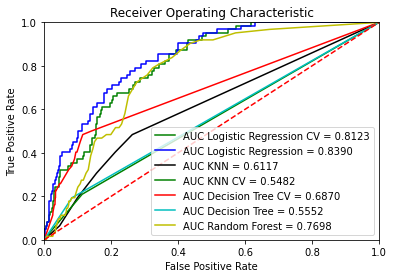

In [1093]:
# ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

#Random Forest
fpr_rf, tpr_rf, threshold_rf = roc_curve(y_test,
                                         y_pred_test_proba_rf[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

#Decision Tree
fpr_dt, tpr_dt, threshold_dt = roc_curve(y_test,
                                         y_pred_test_proba_dt[:, 1])
roc_auc_dt = auc(fpr_dt, tpr_dt)

#Decision Tree CV
fpr_dt_ver_1, tpr_dt_ver_1, threshold_dt_ver_1 = roc_curve(y_test,
                                                              y_pred_test_proba_dt_ver_1[:, 1])
roc_auc_dt_ver_1 = auc(fpr_dt_ver_1, tpr_dt_ver_1)


#KNN CV
fpr_knn_ver_1, tpr_knn_ver_1, threshold_knn_ver_1 = roc_curve(y_test,
                                                              y_pred_test_proba_knn_ver1[:, 1])
roc_auc_knn_ver_1 = auc(fpr_knn_ver_1, tpr_knn_ver_1)

#KNN
fpr_knn, tpr_knn, threshold_knn = roc_curve(y_test,
                                            y_pred_test_proba_knn[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

#Logistic Regression
fpr_logreg, tpr_logreg, threshold_logreg = roc_curve(y_test,
                                                    y_pred_test_proba_logreg[:, 1])
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

#Logistic Regression CV
fpr_logreg_ver_1, tpr_logreg_ver_1, threshold_logreg_ver_1 = roc_curve(y_test,
                                                                      y_pred_test_proba_logreg_ver_1[:,1])
roc_auc_logreg_ver_1 = auc(fpr_logreg_ver_1, tpr_logreg_ver_1)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_logreg_ver_1, tpr_logreg_ver_1, 'g', label = 'AUC Logistic Regression CV = %0.4f' % roc_auc_logreg_ver_1)
plt.plot(fpr_logreg, tpr_logreg, 'b', label = 'AUC Logistic Regression = %0.4f' % roc_auc_logreg)
plt.plot(fpr_knn, tpr_knn, 'k', label = 'AUC KNN = %0.4f' % roc_auc_knn)
plt.plot(fpr_knn_ver_1, tpr_knn_ver_1, 'g', label = 'AUC KNN CV = %0.4f' % roc_auc_knn_ver_1)
plt.plot(fpr_dt_ver_1, tpr_dt_ver_1, 'r', label = 'AUC Decision Tree CV = %0.4f' % roc_auc_dt_ver_1)
plt.plot(fpr_dt, tpr_dt, 'c', label = 'AUC Decision Tree = %0.4f' % roc_auc_dt)
plt.plot(fpr_rf, tpr_rf, 'y', label = 'AUC Random Forest = %0.4f' % roc_auc_rf)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [667]:
# Tampilkan confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true = y_test,
                 y_pred = logreg_test_predict)

# [[tp, fp]]
# [[fn, tn]]

array([[934, 282],
       [ 16,  46]], dtype=int64)

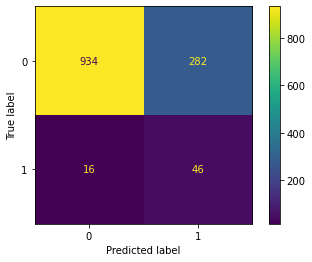

In [676]:
ConfusionMatrixDisplay.from_predictions(y_test, logreg_test_predict)

In [668]:
# Tampilkan confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true = y_test,
                 y_pred = knn_test_predict)

# [[tp, fp]]
# [[fn, tn]]

array([[1026,  190],
       [  43,   19]], dtype=int64)

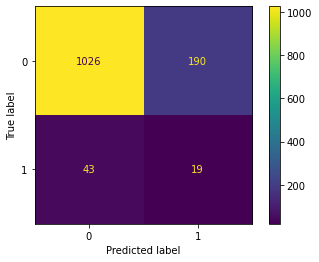

In [677]:
ConfusionMatrixDisplay.from_predictions(y_test, knn_test_predict)

In [669]:
# Tampilkan confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true = y_test,
                 y_pred = svm_test_predict)

# [[tp, fp]]
# [[fn, tn]]

array([[1023,  193],
       [  40,   22]], dtype=int64)

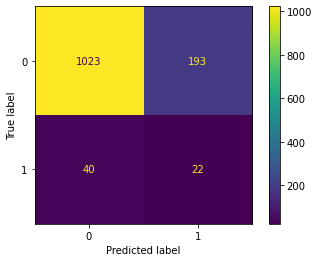

In [678]:
ConfusionMatrixDisplay.from_predictions(y_test, svm_test_predict)

In [670]:
# Tampilkan confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true = y_test,
                 y_pred = dt_test_predict)

# [[tp, fp]]
# [[fn, tn]]

array([[1115,  101],
       [  50,   12]], dtype=int64)

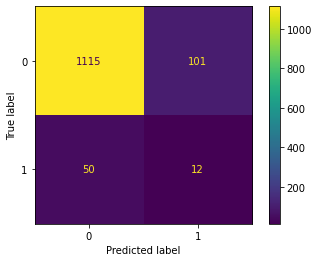

In [679]:
ConfusionMatrixDisplay.from_predictions(y_test, dt_test_predict)

In [671]:
# Tampilkan confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true = y_test,
                 y_pred = rf_test_predict)

# [[tp, fp]]
# [[fn, tn]]

array([[1177,   39],
       [  52,   10]], dtype=int64)

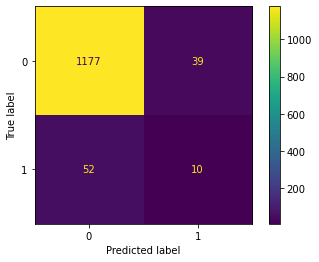

In [680]:
ConfusionMatrixDisplay.from_predictions(y_test, rf_test_predict)

In [672]:
# Tampilkan confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true = y_test,
                 y_pred = dtcv_test_predict)

# [[tp, fp]]
# [[fn, tn]]

array([[1177,   39],
       [  52,   10]], dtype=int64)

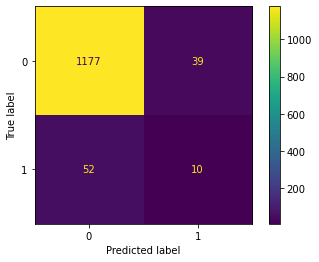

In [681]:
ConfusionMatrixDisplay.from_predictions(y_test, dtcv_test_predict)

In [674]:
# Tampilkan confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true = y_test,
                 y_pred = knncv_test_predict)

# [[tp, fp]]
# [[fn, tn]]

array([[1159,   57],
       [  58,    4]], dtype=int64)

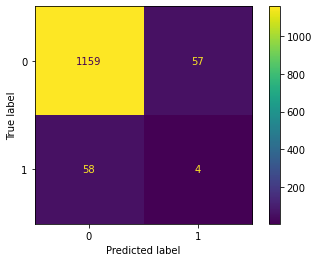

In [682]:
ConfusionMatrixDisplay.from_predictions(y_test, knncv_test_predict)

In [675]:
# Tampilkan confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true = y_test,
                 y_pred = logregcv_test_predict)

# [[tp, fp]]
# [[fn, tn]]

array([[1216,    0],
       [  62,    0]], dtype=int64)

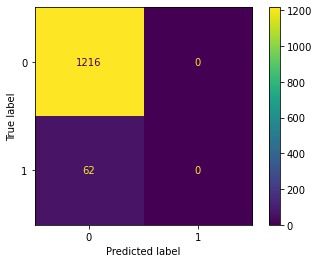

In [1096]:
ConfusionMatrixDisplay.from_predictions(y_test, logregcv_test_predict)

In [1118]:
# Model Decision Tree Classifier
decision_tree_rev = DecisionTreeClassifier(max_depth = 11, random_state = 123)
decision_tree_rev.fit(X_train_clean, y_train)

DecisionTreeClassifier(max_depth=11, random_state=123)

In [1119]:
predicted_dt_rev = pd.DataFrame(decision_tree_rev.predict(X_train_clean))

In [1120]:
# Classification report Cross Validation Logistic Regression
print(classification_report(y_true = y_train,
                            y_pred = predicted_dt_rev,
                            target_names = ["not stroke", "stroke"]))

              precision    recall  f1-score   support

  not stroke       0.98      1.00      0.99      3645
      stroke       0.93      0.70      0.80       187

    accuracy                           0.98      3832
   macro avg       0.96      0.85      0.89      3832
weighted avg       0.98      0.98      0.98      3832



In [1121]:
# Decision Tree Performance
dt_test_predict_rev, score = testPrediction(X_test = X_test_clean,
                                         y_test = y_test,
                                         classifier = decision_tree_rev,
                                         compute_score = True)

Accuracy : 0.9288


In [1122]:
# Classification report Logistic Regression CV
from sklearn.metrics import classification_report

print(classification_report(y_true = y_test,
                            y_pred = dt_test_predict_rev,
                            target_names = ["not stroke", "stroke"]))

              precision    recall  f1-score   support

  not stroke       0.96      0.97      0.96      1216
      stroke       0.20      0.16      0.18        62

    accuracy                           0.93      1278
   macro avg       0.58      0.56      0.57      1278
weighted avg       0.92      0.93      0.92      1278

